# Social Network Analysis - Amber Heard Case - YouTube
MAHMOUD NAGY - JAN 2022

## Table of Contents
<ul>
<li><a href="#intro"><b>Introduction</b></a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
>YouTube - Social Network Analysis on Amber Heard's Case 

In [1]:
import pandas as pd
import os
pd.set_option('display.max_columns', 500)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import matplotlib.dates as mdates
import plotly.express as px
import plotly.graph_objects as go
import pickle
import re
import warnings
import datetime
warnings.filterwarnings('ignore')
sb.set_style("darkgrid")
%matplotlib inline

import plotly.io as pio
pio.renderers
# pio.renderers.default = "svg"
svg_renderer = pio.renderers["svg"]
svg_renderer.width = 950
svg_renderer.height = 550


import helpers

# To Apply helpers updates without resarting the kernel
import importlib
importlib.reload(helpers)

# # To keep track of any module updates
# %load_ext autoreload
# %autoreload2

%config InlineBackend.figure_format = 'retina'

https://stackoverflow.com/questions/24719368/syntaxerror-non-default-argument-follows-default-argument/39942121

In [2]:
cd ../../Filtered Data/comments_cleaned

/Users/mnagy99/jupyter/AH/YouTube_Bot_Analysis/Filtered Data/comments_cleaned


|          Column          |                          Definition                          |
| :----------------------- | :----------------------------------------------------------- |
| etag                     | Record (entity tag); **Unique for each record**                 |
| tl_etag                  | Top Level Comment eTag                                       |
| tl_id                    | Top Level Comment ID                                         |
| tl_video_id              | Top Level Comment Video ID                                   |
| tl_text                  | Top Level Comment Text                                       |
| tl_author_display_name   | Top Level Comment Display name **Not Unique**                |
| tl_author_channed_id     | Top Level Comment Channel ID   **Unique for each Author**    |
| tl_n_likes               | Top Level Comment Number of Likes                            |
| tl_comment_puplish_dtime | Top Level Comment Number Publish Date Time                   |
| tl_comment_update_time   | Top Level Comment Number Update Date Time                    |
| n_replies                | Number of Replies of each record                             |
| replies.comments         | UNDER INVESTIGATIONS                                         |
| tl_moderation_status     | Top Level Comment Moderation Status (Classified Spam or Not) |

<a id='eda'></a>
## Exploratory Data Analysis
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#eda"><b>Exploratory Data Analysis</b></a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

> <ul>
 <li><a href="#spam">Likely Spam</a></li>
 <li><a href="#pos_comments">Positive Comments</a></li>
 <li><a href="#threat_comments">Threat Comments</a></li>
 <li><a href="#neg_comments">Negative Comments</a></li>
 <li><a href="#top_comments">Most Repeated Comments</a></li>
 <li><a href="#same">Same Text Same Date</a></li>
 <li><a href="#text_investigation">Primary Text Investigation</a></li>
 </ul>

In [3]:
df_comments = pd.read_csv("comments_cleaned_zipped.csv", compression='zip',
                          low_memory=False, lineterminator='\n')

df_comments["p_dtime"] = pd.to_datetime(df_comments["p_dtime"])
df_comments["date"] = pd.to_datetime(df_comments["date"])
df_comments["u_dtime"] = pd.to_datetime(df_comments["u_dtime"])

print(df_comments.shape)
df_comments.head()

(2176543, 20)


video_id                 comment_etag            comment_id  \
0  DiXRVYRZchs  mvtTos5huTqXhtAs-JPzt7mls_A  UgjyORuX3p35VXgCoAEC   
1  VPUUrdgxIa8  XpsHQJXeW3QznSOnkHg2LFrp-dU  UggV-BvKpFaaaHgCoAEC   
2  VPUUrdgxIa8  VRefhV-4H8413hvRHP5-zKWyNuQ  Ugio47Mc-eG0dHgCoAEC   
3  VPUUrdgxIa8  auBUVEx3Zm2I35CN0iASII7-3V4  Ugj0tLP9hfrMkXgCoAEC   
4  VPUUrdgxIa8  6NhfYEJJ6zK5ieP-jD9dB25SC-k  Ughdfu9Z390BW3gCoAEC   

                                                text  \
0                                         good work!   
1                     fake lesbian career boost fail   
2  so during movie shoots some actresses use dild...   
3  god liam hemsworth looks insanely a lot like h...   
4                        i'd watch her day and night   

                                           username              author_ch_id  \
0                                     Shocka Delica  UC6cJzw3ChENHVREKzpx1e3Q   
1                                      Vincent Lyle  UCSKuFV9GWVXgh3dtdKCxZoQ   
2  Soluchi {Michael Jackson Lookalike, Dancer, VFX}  UCQb__wEpi5q8_xhkuk2jm5g   
3                                     Chris Andreev  UCseIHRwQ0oAAXK2-e8E2_FA   
4                                Dzimka Bujiashvili  UCzPTU13Mb7dO1jgIbHp2ABw   

   nlikes                   p_dtime                   u_dtime  nreplies  \
0     9.0 2013-11-29 05:18:47+00:00 2013-11-29 05:18:47+00:00       1.0   
1     2.0 2013-12-27 21:05:54+00:00 2013-12-27 21:05:54+00:00       0.0   
2  2093.0 2013-12-26 01:24:40+00:00 2013-12-26 01:24:40+00:00       7.0   
3     0.0 2013-12-07 21:22:41+00:00 2013-12-07 21:22:41+00:00       3.0   
4     7.0 2013-12-04 23:01:35+00:00 2013-12-04 23:01:35+00:00       0.0   

  moderation_status comment_reply parent_id author_ch_url  \
0               NaN       comment      none          none   
1               NaN       comment      none          none   
2               NaN       comment      none          none   
3               NaN       comment      none          none   
4               NaN       comment      none          none   

  author_profile_image  year       date month  dayofmonth  hour  
0                 none  2013 2013-11-29   Nov          29     5  
1                 none  2013 2013-12-27   Dec          27    21  
2                 none  2013 2013-12-26   Dec          26     1  
3                 none  2013 2013-12-07   Dec           7    21  
4                 none  2013 2013-12-04   Dec           4    23

In [4]:
df_comments.p_dtime.dt.date.min(), df_comments.p_dtime.dt.date.max()

(datetime.date(2008, 3, 26), datetime.date(2021, 12, 8))

In [5]:
df_comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2176543 entries, 0 to 2176542
Data columns (total 20 columns):
 #   Column                Dtype              
---  ------                -----              
 0   video_id              object             
 1   comment_etag          object             
 2   comment_id            object             
 3   text                  object             
 4   username              object             
 5   author_ch_id          object             
 6   nlikes                float64            
 7   p_dtime               datetime64[ns, UTC]
 8   u_dtime               datetime64[ns, UTC]
 9   nreplies              float64            
 10  moderation_status     object             
 11  comment_reply         object             
 12  parent_id             object             
 13  author_ch_url         object             
 14  author_profile_image  object             
 15  year                  int64              
 16  date                  datetime64[ns]

In [6]:
helpers.isnull(df_comments)

The number of NaNs in video_id: 0
The number of NaNs in comment_etag: 0
The number of NaNs in comment_id: 0
The number of NaNs in text: 532
The number of NaNs in username: 49
The number of NaNs in author_ch_id: 23
The number of NaNs in nlikes: 0
The number of NaNs in p_dtime: 0
The number of NaNs in u_dtime: 0
The number of NaNs in nreplies: 0
The number of NaNs in moderation_status: 2174298
The number of NaNs in comment_reply: 0
The number of NaNs in parent_id: 0
The number of NaNs in author_ch_url: 0
The number of NaNs in author_profile_image: 0
The number of NaNs in year: 0
The number of NaNs in date: 0
The number of NaNs in month: 0
The number of NaNs in dayofmonth: 0
The number of NaNs in hour: 0


In [7]:
df_comments.dropna(subset=['text'], inplace=True)

In [8]:
sum(df_comments.p_dtime != df_comments.u_dtime)

133253

In [9]:
for col in ['year', 'username', 'moderation_status', 'comment_reply']:
    print('The value counts of ' + col)
    print(df_comments[col].value_counts().head())
    print('\n')

The value counts of year
2020    893138
2021    792578
2018    192108
2019    118408
2016     54618
Name: year, dtype: int64


The value counts of username
Johnny Depp       15986
eHacker            8343
JOHNNY DEPP        3921
Stevie J Raw       3516
LaraCroftEyes1     3270
Name: username, dtype: int64


The value counts of moderation_status
likelySpam    2240
Name: moderation_status, dtype: int64


The value counts of comment_reply
comment    1692570
reply       483441
Name: comment_reply, dtype: int64




<br>

In [10]:
df_creations = pd.read_csv('daily_creations.csv')
df_creations.date = pd.to_datetime(df_creations.date)
print(df_creations.shape)
df_creations.head()

(76597, 8)


date  year month  dayofmonth  hour  ncomments  nreplies  nlikes
0 2018-07-21  2018   Jul          21    20       6998      2994   38909
1 2018-07-21  2018   Jul          21    19       4877      2181   30351
2 2020-10-24  2020   Oct          24     8       4404      1121   24569
3 2018-07-21  2018   Jul          21    21       3153      1087   16811
4 2018-11-19  2018   Nov          19    17       2673      1775   21042

<br>

In [11]:
# Create an empty set of negatively commenting users
neg_users = set()

In [12]:
# To Load the set of negativly commented users
with open('negative_users.pkl', 'rb') as f:
    neg_users = pickle.load(f)

In [13]:
# Those users were checked and did not find negative comments
checked_set = {'eHacker', 'Stevie J Raw', 'DarthN3ws', "Nerdette's NewsStand", 'Sunshine', 'Binge Central',
               'Abbey Sharp', 'ko 3', 'Mary Shephard', 'Madison Beer', 'Baby Bunny', 'LadyDominion',
               'Tom Harlock', 'Gus Johnson', 'Mr. Bruhhh', 'Crypto Info 2', 'demi demi', '8-Bit Tex', 'Ty Y', 
               'Incredibly Average', 'DELCARAJO TV', 'Flashback FM','Funeral bug', 'Stranger In the Alps', 
               "Nerdette's NewsStand"}

In [14]:
neg_users = neg_users - checked_set

In [15]:
len(neg_users)

232814

<br>

<br>

<a id='spam'></a>
> ## Exploring Likely Spam Comments
> <ul>
 <li><a href="#spam"><b>Likely Spam</b></a></li>
 <li><a href="#pos_comments">Positive Comments</a></li>
 <li><a href="#threat_comments">Threat Comments</a></li>
 <li><a href="#neg_comments">Negative Comments</a></li>
 <li><a href="#top_comments">Most Repeated Comments</a></li>
 <li><a href="#same">Same Text Same Date</a></li>
 <li><a href="#text_investigation">Primary Text Investigation</a></li>
 </ul>

**Note:** These Comments are classified as likelySpam in youtube moderation_status

In [16]:
df_comments.moderation_status.value_counts()

likelySpam    2240
Name: moderation_status, dtype: int64

In [17]:
df_spam = df_comments.query(" moderation_status == 'likelySpam' ")
print(f'{df_spam.shape[0]} contributions, on {df_spam.video_id.nunique()} Videos, made by {df_spam.username.nunique()} Users')
df_spam.head()

2240 contributions, on 353 Videos, made by 1596 Users


video_id                 comment_etag            comment_id  \
15856  RZ9pdYUENBg  2ytSk1FE1AJA97Q2Madd1n98VHI  Ugh_5obtRQF8R3gCoAEC   
15874  EYo38Ffrzxk  Sf1VnkAphb--YodRkkQ1aT3moO0  Ugg8MVtx6Qxvg3gCoAEC   
16069  V07XevGKH5k  u4C1TEulypSdrp_D_ISLHILt8VI  UgjJ-c4hBX9NRngCoAEC   
16203  hFU-vcdwRMw  vKz_q216ZrAvj3G7PrhmzYYpkFA  UggZjr6ZeWNAg3gCoAEC   
16229  D24p1rQ-yo4  QufN8e7Ymk2uvxAZcCcL2zlTYn4  Uggm7RoSoQQ6YngCoAEC   

                                                    text           username  \
15856                                she is so beautiful           esvhgvtr   
15874  she kinda looks like scarlett johansson here b...        blinkatreyu   
16069              johnny is so hoooooooooootoh my godآ          Firko Depp   
16203  johny depp ruined vanessa paradis kate moss an...     Hanah Hamilton   
16229  nicolas cagein a 3d moviehe's gonna eat the au...  Shanethefilmmaker   

                   author_ch_id  nlikes                   p_dtime  \
15856  UClld9-rBfNePAy8647U2MQw     9.0 2014-01-18 04:57:12+00:00   
15874  UCJZHrLO0zTL_Udgb9CbVMww     1.0 2014-05-27 02:26:16+00:00   
16069  UCYDTxSvgndy3sJ3M6Z9cCjA    14.0 2014-01-28 11:53:37+00:00   
16203  UCidXyburWKIjXcGmwylrfDA     0.0 2014-02-26 03:00:30+00:00   
16229  UCaoGpMOT6ZkYcIElEKVoICQ     0.0 2014-01-15 18:57:09+00:00   

                        u_dtime  nreplies moderation_status comment_reply  \
15856 2014-01-18 04:57:12+00:00       1.0        likelySpam       comment   
15874 2014-05-27 02:26:16+00:00       0.0        likelySpam       comment   
16069 2014-01-28 11:53:37+00:00       1.0        likelySpam       comment   
16203 2014-02-26 03:00:30+00:00       0.0        likelySpam       comment   
16229 2014-01-15 18:57:09+00:00       0.0        likelySpam       comment   

      parent_id author_ch_url author_profile_image  year       date month  \
15856      none          none                 none  2014 2014-01-18   Jan   
15874      none          none                 none  2014 2014-05-27   May   
16069      none          none                 none  2014 2014-01-28   Jan   
16203      none          none                 none  2014 2014-02-26   Feb   
16229      none          none                 none  2014 2014-01-15   Jan   

       dayofmonth  hour  
15856          18     4  
15874          27     2  
16069          28    11  
16203          26     3  
16229          15    18

In [18]:
df_spam.username.value_counts().head(15)

Well, well, well, how the turntables    73
LaraCroftEyes1                          51
Disney Takes Huge Dix                   41
Vladimir Manosalvas IG: TheVladMan      23
k. _nf                                  21
george washington                       19
Chris Corley                            18
Muerte Anunciada                        16
Josuأ© Veguilla                         14
BobbyDuke                               14
bosnis                                  12
Sam Kresil                              12
Pommie ًںگ» Bears                       11
The Amber Heard Playlist!!              11
Lindsey Depp                             9
Name: username, dtype: int64

In [19]:
df_spam.text.value_counts().head(60)

#justiceforjohnnydepp                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

<br>

<a id='pos_comments'></a>
> ## Primary Text Investigation
> <ul>
 <li><a href="#spam">Likely Spam</a></li>
 <li><a href="#pos_comments"><b>Positive Comments</b></a></li>
 <li><a href="#threat_comments">Threat Comments</a></li>
 <li><a href="#neg_comments">Negative Comments</a></li>
 <li><a href="#top_comments">Most Repeated Comments</a></li>
 <li><a href="#same">Same Text Same Date</a></li>
 <li><a href="#text_investigation">Primary Text Investigation</a></li>
 </ul>

This positive comments section is to be deducted later from the negative comments data to increase the counts accuracy

In [20]:
pos_text = {'love amber', 'stand with amber', 'standwithamber', 'support amber', 'supportamber', 'justiceforamber', 
            'johnnydeppisawifebeater', 'boycottwomenbeaters', 'wearewithamber', 'justice for amber', 
            'istandwithamber','wearewithyouamber', 'amber heard is innocent', 'amber is innocent','support her'}

In [21]:
df_pos = df_comments[df_comments.text.str.contains('|'.join(pos_text))]
print(f'{df_pos.shape[0]} contributions, on {df_pos.video_id.nunique()} Videos, made by {df_pos.username.nunique()} Users')
df_pos.head(2)

3564 contributions, on 1166 Videos, made by 2787 Users


video_id                 comment_etag                  comment_id  \
414  EYo38Ffrzxk  lszA-zsDuxsipz45LAZdRc8DYOc  UgyeKlHSK2ubb7uaQH14AaABAg   
470  yrTk-BEQ4kA  RkYh4qVNclPg1LnIAlGL8VHaEok  UgyQYAZ2Lf0islXlSsJ4AaABAg   

                                                  text           username  \
414  she is gorgeous top looking natural beauty i l...  Abdelyamine kamel   
470  nice video im glad my beautiful baby is happy ...      Lorena Correa   

                 author_ch_id  nlikes                   p_dtime  \
414  UC6UwWh45hW84f2tU8X-H3-g     0.0 2013-03-30 20:06:28+00:00   
470  UC-U0b5opsXnGRyHBzRSSLjw     0.0 2013-08-23 18:51:31+00:00   

                      u_dtime  nreplies moderation_status comment_reply  \
414 2013-03-30 20:06:28+00:00       0.0               NaN       comment   
470 2013-08-23 18:51:31+00:00       1.0               NaN       comment   

    parent_id author_ch_url author_profile_image  year       date month  \
414      none          none                 none  2013 2013-03-30   Mar   
470      none          none                 none  2013 2013-08-23   Aug   

     dayofmonth  hour  
414          30    20  
470          23    18

In [22]:
df_pos.username.nunique()

2787

In [23]:
df_pos.text.value_counts().head(60)

i love amber                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [24]:
pos_users = list(df_pos.username) 

In [25]:
'Worldie - Social Media for Good' in pos_users

True

In [26]:
'Christina Taft' in pos_users

True

<br>

<a id='threat_comments'></a>
> ## Exploring Threat Comments
> <ul>
 <li><a href="#spam">Likely Spam</a></li>
 <li><a href="#pos_comments">Positive Comments</a></li>
    <li><a href="#threat_comments"><b>Threat Comments</b></a></li>
 <li><a href="#neg_comments">Negative Comments</a></li>
 <li><a href="#top_comments">Most Repeated Comments</a></li>
 <li><a href="#same">Same Text Same Date</a></li>
 <li><a href="#text_investigation">Primary Text Investigation</a></li>
 </ul>

Filter on threat and hate speech keywords

In [27]:
# KYS is an internet acronym standing for “kill yourself
all_threat = {'deathto', "death to fascists", "death to mera", "death to all narcissistic", "social death to", 
              "professional death", "death to femnazis", "death to those people", ' go die', 'die cunt', 
              'kill heard', 'kill amber', 'kill her', 'kys fuck you amber', 'deserve', 'jail', 'prison', 
              'pay for her crimes', 'if she wants assault she well get it', 'death to a turd', 'amberfbi',
              'death to anybody not supporting johnny', 'kiss of death', 'death amber', 'go kill yourselves',
              'kill all the people who disliked', 'to hell', 'tohell', 'in hell', 'inhell', "who the hell is",
              'burn her', 'burn turd', 'her burn', 'isacriminal', 'amberfbi', 'pay for her crime'}

In [28]:
df_threat = df_comments[df_comments.text.str.contains('|'.join(all_threat))]
print(df_threat.shape)

(53640, 20)


In [29]:
# exclude all the users with positive comments
df_threat = df_threat[~df_threat.username.isin(pos_users)]
print(f'{df_threat.shape[0]} contributions, on {df_threat.video_id.nunique()} Videos, made by {df_threat.username.nunique()} Users')
df_threat.head(2)

49162 contributions, on 2905 Videos, made by 35476 Users


video_id                 comment_etag                  comment_id  \
162  VPUUrdgxIa8  lD2ER_p_Yoz01X67kGnxIoV6MKE  UgzHBtjBQC_mDMMciWh4AaABAg   
367  EYo38Ffrzxk  j2lxzgRc_C5WGsdsE6EZtXY2pak  Ugx2-K3uDRp1niNrnZR4AaABAg   

                                                  text      username  \
162  he doesnt deserve miley cyrus that australian ...  brysonbrwn91   
367   do you believe white children deserve a homel...   Jimmy Straw   

                 author_ch_id  nlikes                   p_dtime  \
162  UCJlswOTmpnXFoU15p0Z8sJQ     0.0 2013-08-13 23:10:38+00:00   
367  UCKSLq0MvyV-ohALHGzQaISA     0.0 2013-09-15 16:04:57+00:00   

                      u_dtime  nreplies moderation_status comment_reply  \
162 2013-08-13 23:10:38+00:00       0.0               NaN       comment   
367 2013-09-15 16:04:57+00:00       0.0               NaN       comment   

    parent_id author_ch_url author_profile_image  year       date month  \
162      none          none                 none  2013 2013-08-13   Aug   
367      none          none                 none  2013 2013-09-15   Sep   

     dayofmonth  hour  
162          13    23  
367          15    16

In [30]:
df_threat.to_csv('threat_comments_zipped.csv', compression="zip", index=False)

In [31]:
# df_threat = pd.read_csv('threat_comments_zipped.csv', compression="zip", 
#                         low_memory=False, lineterminator='\n')
# print(f'{df_threat.shape[0]} contributions, on {df_threat.video_id.nunique()} Videos, made by {df_threat.username.nunique()} Users')
# df_threat.head(2)

In [32]:
df_threat.text.value_counts().head(60)

she should be in jail                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

<br>

### A Heat Map for the Threat Comments 


Note: The Peaks on Feb, July, Dec 2020



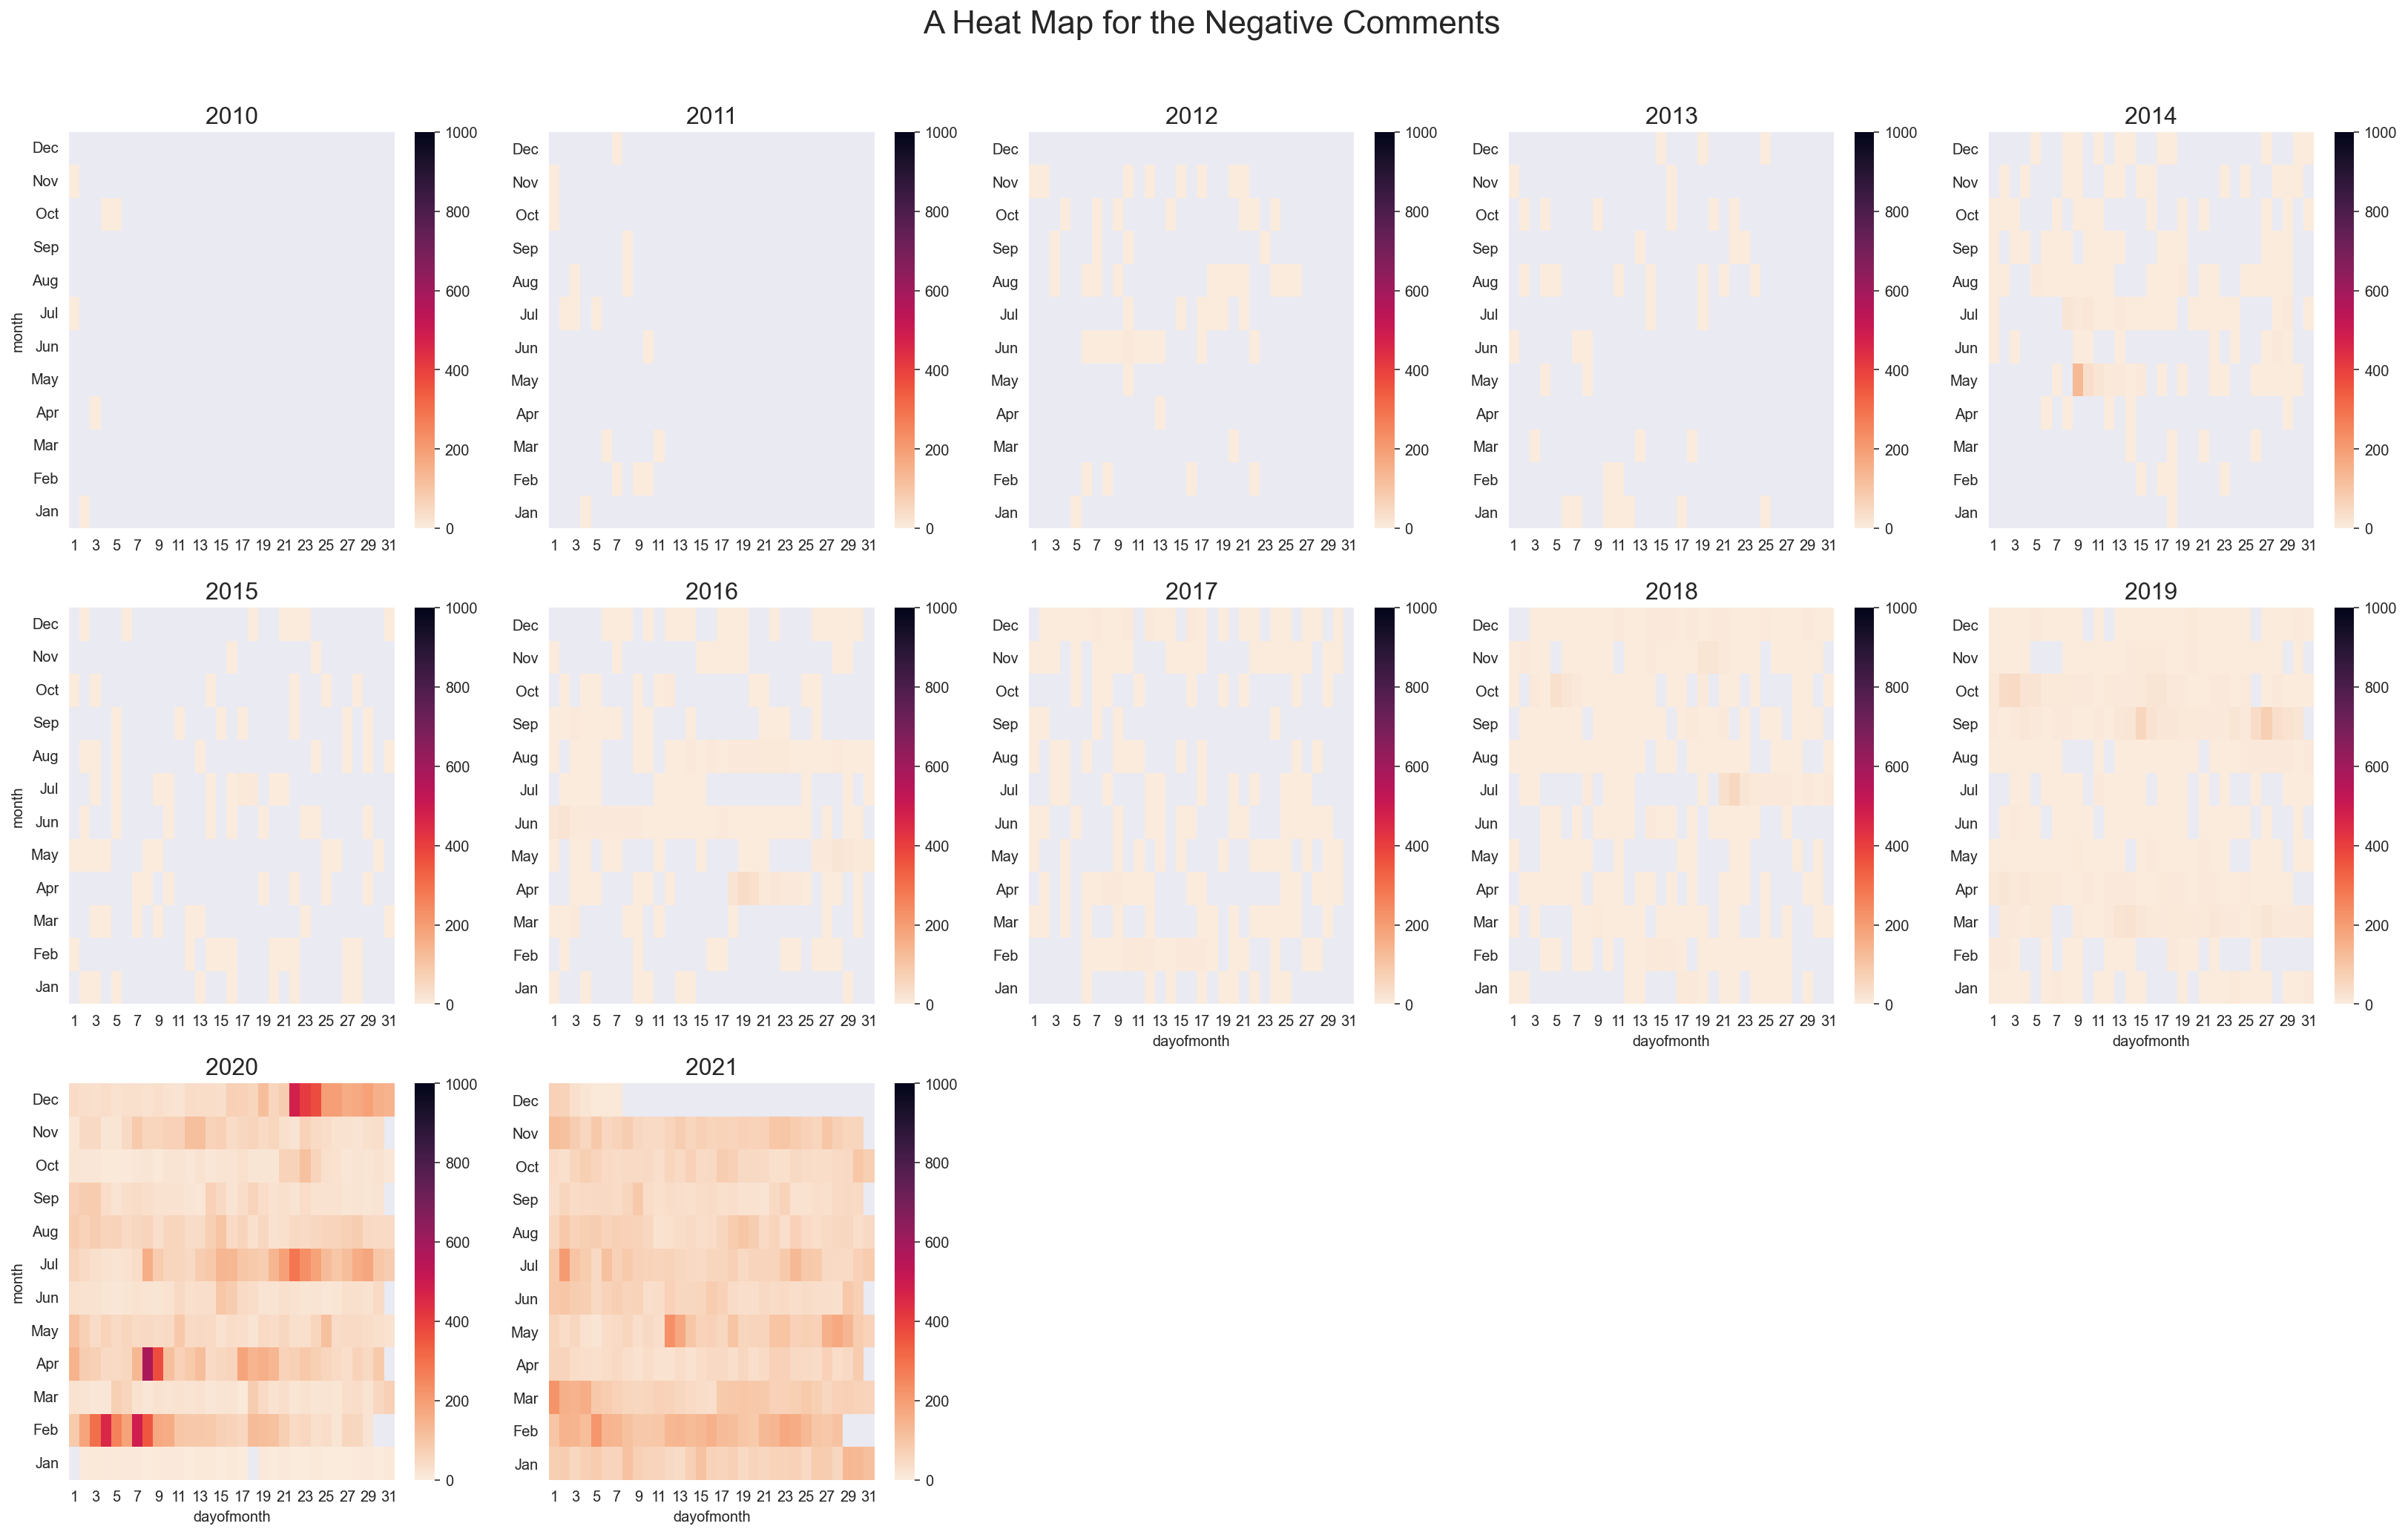

In [33]:
threat_daily = df_threat.groupby(['year', 'dayofmonth', 'month']).size().reset_index(name='ncomments')

print('\nNote: The Peaks on Feb, July, Dec 2020\n')
title = 'A Heat Map for the Negative Comments'
helpers.facet_heat(threat_daily, title, n_col=5, vmax=1000)

### Threat Comments Peak Dates

In [34]:
threat_dates = df_threat.groupby(['date']).agg({'text':'count', 'nlikes': 'sum', 'nreplies': 'sum'}).reset_index(
).rename(columns={'text':'ncomments'}).sort_values('ncomments', ascending=False)

threat_dates.head(15)

date  ncomments   nlikes  nreplies
1330 2020-04-08        576  12915.0     439.0
1269 2020-02-07        492  31479.0     690.0
1588 2020-12-22        478   2070.0      24.0
1266 2020-02-04        456  16334.0     378.0
1589 2020-12-23        410   1401.0      41.0
1331 2020-04-09        373   8983.0     250.0
1590 2020-12-24        372   1117.0      43.0
1270 2020-02-08        352  10578.0     259.0
1265 2020-02-03        303  13181.0     269.0
1435 2020-07-22        286  13730.0     319.0
1267 2020-02-05        262   4247.0     138.0
1436 2020-07-23        232  11189.0     140.0
1729 2021-05-12        228   2408.0     106.0
1657 2021-03-01        219   2573.0     118.0
1633 2021-02-05        218   1891.0      59.0

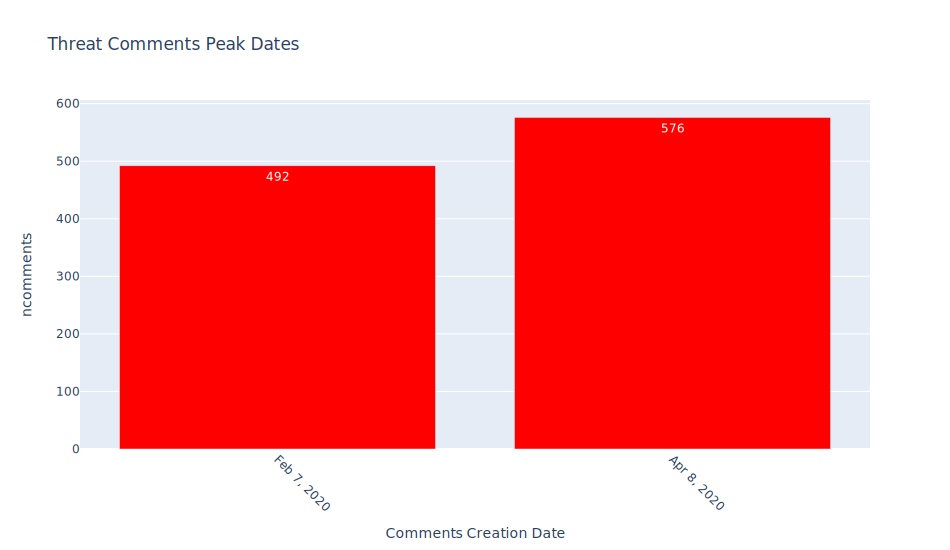

In [35]:
helpers.bar_peaks(threat_dates[['date', 'ncomments']].head(2), 
                  'Threat Comments Peak Dates')

<br>

<a id='neg_comments'></a>
> ## Exploring Negative Comments
> <ul>
 <li><a href="#spam">Likely Spam</a></li>
 <li><a href="#pos_comments">Positive Comments</a></li>
 <li><a href="#threat_comments">Threat Comments</a></li>
 <li><a href="#neg_comments"><b>Negative Comments</b></a></li>
 <li><a href="#top_comments">Most Repeated Comments</a></li>
 <li><a href="#same">Same Text Same Date</a></li>
 <li><a href="#text_investigation">Primary Text Investigation</a></li>
 </ul>

<a id='negative_comments'></a>
>> ## Negative Comments
> <ul>
    <li><a href="#negative_comments"><b>Negative Comments</b></a></li>
 <li><a href="#victim">Contains "Victim"</a></li>
 <li><a href="#no_victim">Negative Comments Without "Victim"</a></li>
 </ul>

In [36]:
# To Load the dictionary of negative text    
with open('negative_text.pkl', 'rb') as f:
    neg_dict = pickle.load(f) 
    neg_text = set(neg_dict.keys())

In [37]:
neg_text = neg_text | all_threat

In [38]:
neg_text = neg_text | {'narcissist', 'cancelamber', 'cancel amber', 'amber sucks', 'hate amber heard', 'scamber', 
                       'boycott amber', 'amber heard sucks', "i remind that amber heard craped on jonny depp's bed",
                       'amber heard is trash', 'deleteamber', 'delete amber', 'amber heard is a monster'}

In [39]:
neg_text

{' death',
 ' death ',
 ' go die',
 ' raped',
 '#fuckamberheard',
 '50 million',
 '7 million',
 '@amberheard fuck you',
 'abus',
 'abuse',
 'abuser',
 'abusing',
 'aggressive',
 'aggressively pull',
 'alcoholic',
 'amber abus',
 'amber heard abus',
 'amber heard is a monster',
 'amber heard is trash',
 'amber heard sucks',
 'amber lunge',
 'amber sucks',
 'amber turd',
 'amber-heard-abus',
 'amberfbi',
 'amberheardisaliar',
 'amberheardisanabuser',
 'amberheardisanabuserandliar',
 'amberisanabuser',
 'ambertheabuser',
 'amberturd',
 'assault',
 'assaulted johnny',
 'beaten',
 'beaten up',
 'because she is a woman',
 'because she’s a woman',
 'bitch',
 'boycott amber',
 'boycottamber',
 'boycottamberheard',
 'bullshit',
 'burn',
 'burn her',
 'burn in hell',
 'burn turd',
 'burninhell',
 'cancel amber',
 'cancelamber',
 'change.org',
 'clawing',
 'clown',
 'cunt',
 'death',
 'death amber',
 'death to a turd',
 'death to all narcissistic',
 'death to amber',
 'death to anybody not suppor

# Negative Comments

In [40]:
# df_neg_total = df_comments[df_comments.text.str.contains('|'.join(neg_text))]
# print(df_neg_total.shape)

In [41]:
# # exclude all the users with positive comments
# df_neg_total = df_neg_total[~df_neg_total.username.isin(pos_users)]
# print(df_neg_total.shape)
# df_neg_total.head(2)

In [42]:
df_neg_total = pd.read_csv('negative_comments_zipped.csv', compression="zip", 
                           low_memory=False, lineterminator='\n')
print(f'{df_neg_total.shape[0]} contributions, on {df_neg_total.video_id.nunique()} Videos, made by {df_neg_total.username.nunique()} Users')
df_neg_total.head(2)

381226 contributions, on 4230 Videos, made by 227750 Users


video_id                 comment_etag                  comment_id  \
0  VPUUrdgxIa8  N0IcnfXWAATmNc7PATmVsXq5-58  UgycOQe20TUYIOyB5zR4AaABAg   
1  VPUUrdgxIa8  qorqkViON0Ig3VMl0EmlAvX5H3E  UgztIGiBkAiBgyO03rR4AaABAg   

                                                text            username  \
0  whoa hold on there buddy are you saying that p...  lowdownshakinchill   
1  it was part of an idiotic series of comments w...               jsssm   

               author_ch_id  nlikes                    p_dtime  \
0  UCCOdIP_feMgW00kp1fiE8fg     0.0  2013-09-01 18:55:13+00:00   
1  UCv0UUMS3TZgn68PnWDWAVpw     0.0  2013-08-15 22:56:15+00:00   

                     u_dtime  nreplies moderation_status comment_reply  \
0  2013-09-01 18:55:13+00:00       0.0               NaN       comment   
1  2013-08-15 22:56:15+00:00       0.0               NaN       comment   

  parent_id author_ch_url author_profile_image  year        date month  \
0      none          none                 none  2013  2013-09-01   Sep   
1      none          none                 none  2013  2013-08-15   Aug   

   dayofmonth  hour  
0           1    18  
1          15    22

In [43]:
users_negative_set = set(df_neg_total.username) - {np.nan}
len(users_negative_set)

227750

In [44]:
neg_users = neg_users | users_negative_set

In [45]:
df_neg_total.text.value_counts().head(60)

they won't believe you because you are a man she is not a victim                                                                               43276
they won't believe you because you are a man amber heard she is not a victim                                                                    1595
they won't believe you because you are a man she is not the victim                                                                              1331
she is not a victim                                                                                                                             1109
they wont believe you because you are a man she is not a victim                                                                                 1019
they won't believe you because your a man she is not a victim                                                                                   1010
they won't believe you because you are a man she is not a victim!                                         

### Likely-Spam Negative Comments

In [46]:
df_neg_total.moderation_status.value_counts()

likelySpam    405
Name: moderation_status, dtype: int64

In [47]:
df_neg_spam = df_neg_total.query(" moderation_status == 'likelySpam' ")
print(f'{df_neg_spam.shape[0]} contributions, on {df_neg_spam.video_id.nunique()} Videos, made by {df_neg_spam.username.nunique()} Users')
df_neg_spam.head(2)

405 contributions, on 149 Videos, made by 241 Users


video_id                 comment_etag            comment_id  \
1700  NRlp5njBZyw  lN_sY5UexLfnmvfeCGUwWJ-yGCc  UghRoax9kwxbA3gCoAEC   
3898  Y4Xh2KBI4I0  dTzx5tbiBn6_QIvdti-xAe7bKIo  UghfIXDT_Ut1C3gCoAEC   

                                                   text     username  \
1700  mr4:3 and 1440p strike again getting real tire...   PaperManga   
3898                these are some god acting skills!!!  id104335409   

                  author_ch_id  nlikes                    p_dtime  \
1700  UCZOawtPKJPig3HfwGWVzeRw     0.0  2014-02-23 11:50:01+00:00   
3898  UCptxRTUw5NZx7gtrIlbYZYw     1.0  2016-04-18 09:46:24+00:00   

                        u_dtime  nreplies moderation_status comment_reply  \
1700  2014-02-23 11:50:01+00:00       0.0        likelySpam       comment   
3898  2016-04-18 09:46:24+00:00       0.0        likelySpam       comment   

     parent_id author_ch_url author_profile_image  year        date month  \
1700      none          none                 none  2014  2014-02-23   Feb   
3898      none          none                 none  2016  2016-04-18   Apr   

      dayofmonth  hour  
1700          23    11  
3898          18     9

In [48]:
df_neg_spam.text.value_counts().head(60)

please sign this petition to remove abuser heard from aquaman 2 over 400000 signatures so far! https://wwwchangeorg/p/dc entertainment remove amber heard from aquaman 2?fbclid=iwar2kn9zpj azwunc96oivouhbytonesxogxv2wlytirfkghm_0paltjuyh8                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

### Negative Likely-Spam Comments Peak Dates

In [49]:
neg_spam_dates = df_neg_spam.groupby(['date']).agg({'text':'count', 'nlikes': 'sum', 'nreplies': 'sum'}).reset_index(
).rename(columns={'text':'ncomments'}).sort_values('ncomments', ascending=False)

neg_spam_dates.head(15)

date  ncomments  nlikes  nreplies
71   2020-02-07         26    14.0       0.0
108  2020-04-19         19     5.0       0.0
70   2020-02-06         19     6.0       0.0
77   2020-02-13         14     2.0       0.0
74   2020-02-10         12     4.0       0.0
73   2020-02-09         11    18.0       0.0
79   2020-02-15         10     5.0       1.0
112  2020-05-11          9    11.0       0.0
72   2020-02-08          8     4.0       0.0
86   2020-02-25          7     1.0       0.0
80   2020-02-16          6     0.0       0.0
138  2020-07-29          6     2.0       1.0
139  2020-07-30          5     0.0       0.0
92   2020-03-11          5     2.0       0.0
123  2020-06-15          5     1.0       0.0

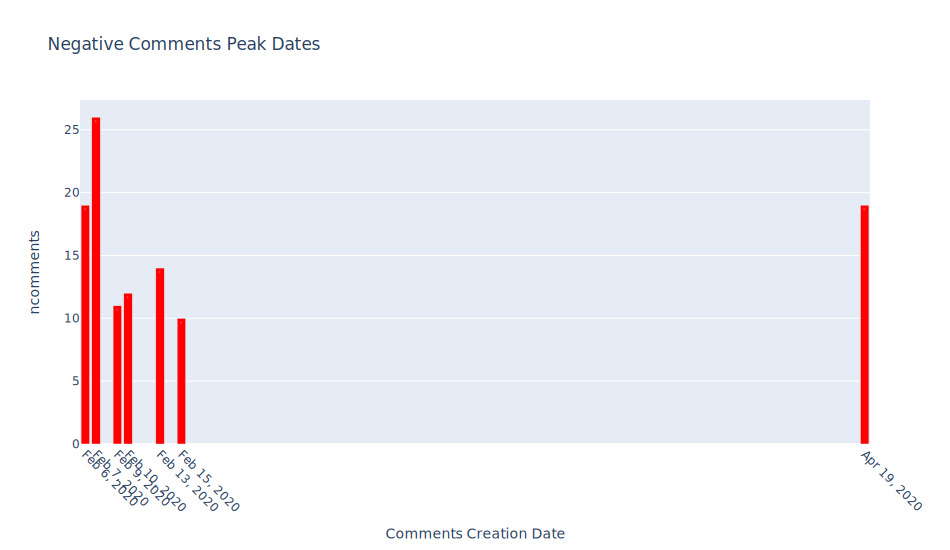

In [50]:
helpers.bar_peaks(neg_spam_dates[['date', 'ncomments']].head(7), 
                  'Negative Comments Peak Dates')

### A Heat Map for the Negative Comments 


Note: The Peaks on Feb, Dec 2020



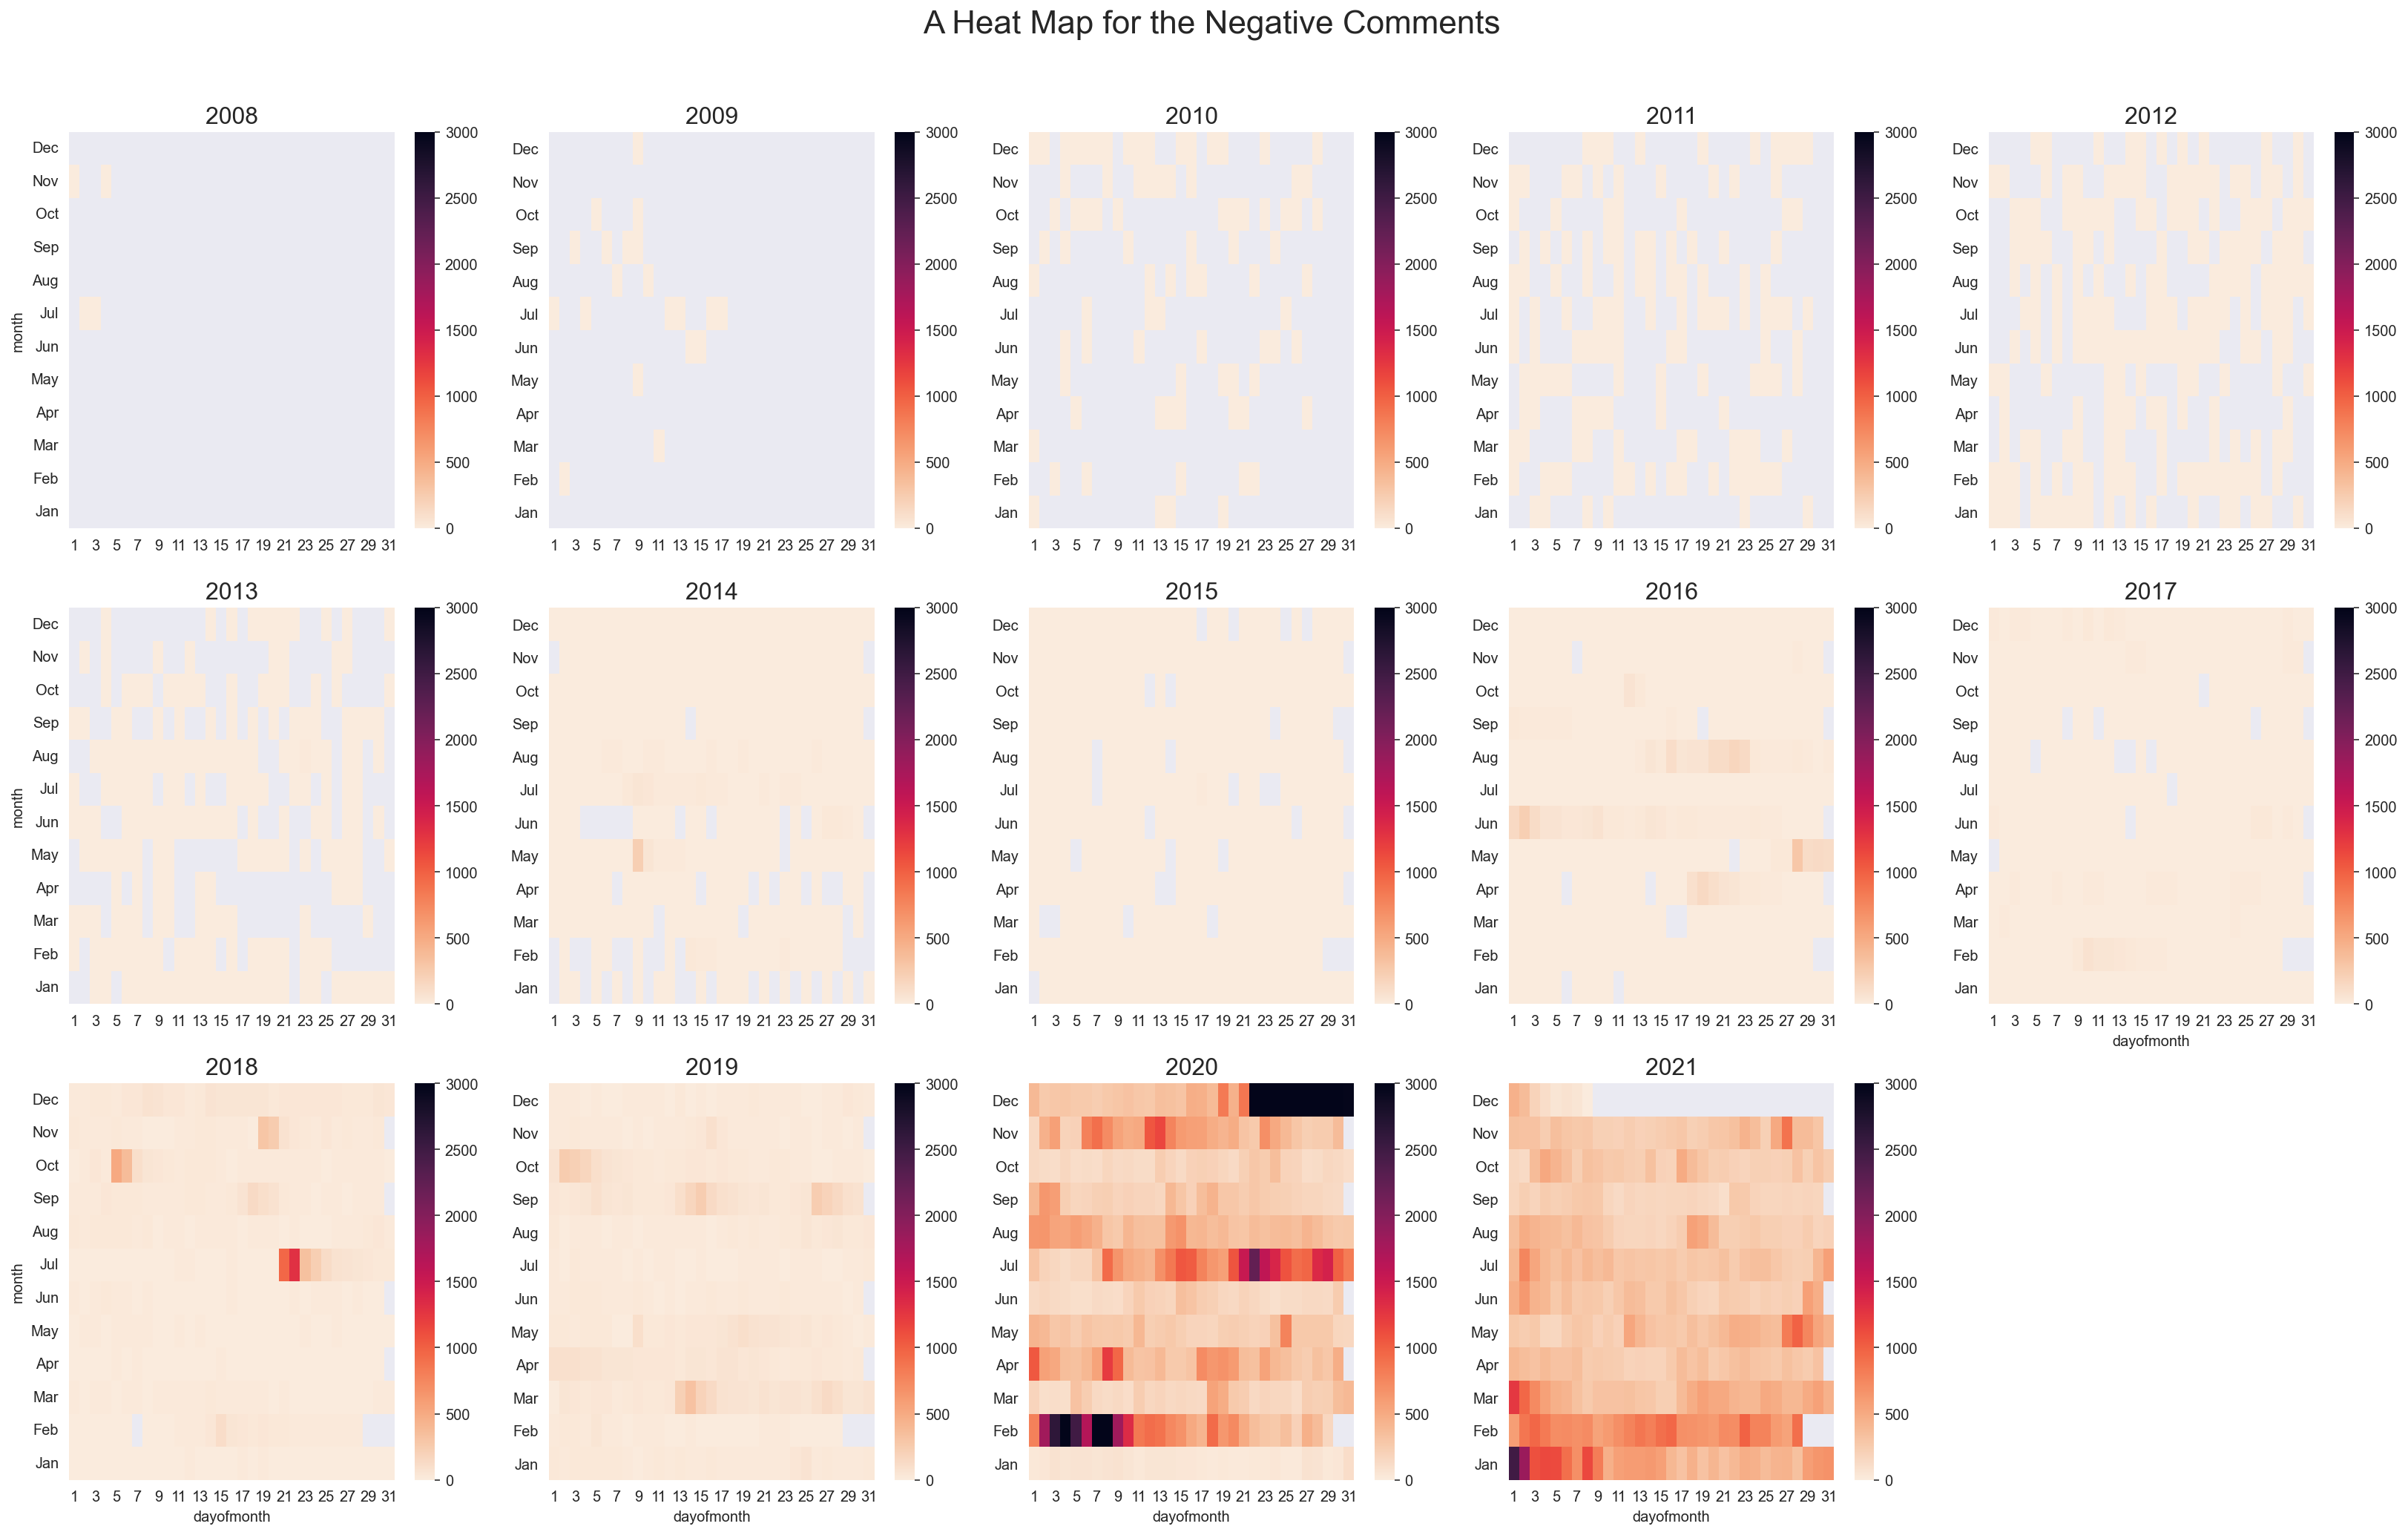

In [51]:
neg_daily = df_neg_total.groupby(['year', 'dayofmonth', 'month']).size().reset_index(name='ncomments')

print('\nNote: The Peaks on Feb, Dec 2020\n')
title = 'A Heat Map for the Negative Comments'
helpers.facet_heat(neg_daily, title, n_col=5, vmax=3000)

### Negative Comments Peak Dates

In [52]:
negative_dates = df_neg_total.groupby(['date']).agg({'text':'count', 'nlikes': 'sum', 'nreplies': 'sum'}).reset_index(
).rename(columns={'text':'ncomments'}).sort_values('ncomments', ascending=False)

negative_dates.head(15)

date  ncomments    nlikes  nreplies
3093  2020-12-27      12837  175308.0     769.0
3092  2020-12-26       9639  169265.0     557.0
3089  2020-12-23       9553  240048.0    1376.0
3090  2020-12-24       8423  234557.0     941.0
3094  2020-12-28       7951   94882.0     624.0
3095  2020-12-29       6144   92072.0     709.0
3096  2020-12-30       4801   80637.0     434.0
3091  2020-12-25       4409   90777.0     452.0
2766  2020-02-04       4347  121480.0    3223.0
3088  2020-12-22       3744  117748.0     780.0
2769  2020-02-07       3329   92380.0    2592.0
2770  2020-02-08       3062  107037.0    1964.0
3097  2020-12-31       2965   47417.0     448.0
2765  2020-02-03       2635  114041.0    2939.0
3098  2021-01-01       2495   37574.0     334.0

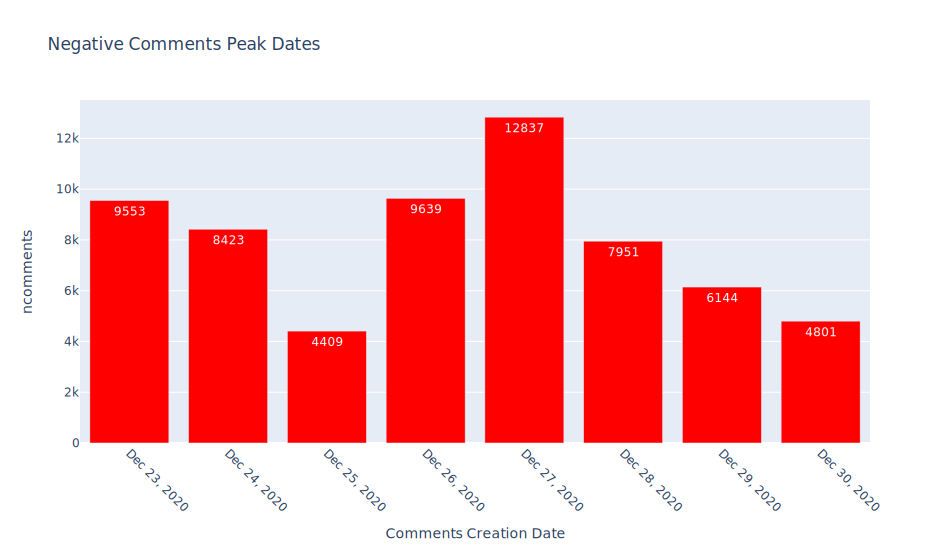

In [53]:
helpers.bar_peaks(negative_dates[['date', 'ncomments']].head(8), 
                  'Negative Comments Peak Dates')

<br>

<a id='victim'></a>
>> ## Contains "Victim"
> <ul>
 <li><a href="#negative_comments">Negative Comments</a></li>
    <li><a href="#victim"><b>Contains "Victim"</b></a></li>
 <li><a href="#no_victim">Negative Comments Without "Victim"</a></li>
 </ul>

In [54]:
df_victim = df_comments[df_comments.text.str.contains('victim')]
print(df_victim.shape)

(103766, 20)


In [55]:
# exclude all the users with positive comments
df_victim = df_victim[~df_victim.username.isin(pos_users)]
print(f'{df_victim.shape[0]} contributions, on {df_victim.video_id.nunique()} Videos, made by {df_victim.username.nunique()} Users')
df_victim.head(2)

99093 contributions, on 2438 Videos, made by 83717 Users


video_id                 comment_etag                  comment_id  \
2031  MZGyGk0xBlw  cz-SMsQ5YsMXCcFcofJ-_UQK_j0  UgybCR6PJSFIo6r2SoB4AaABAg   
4350  ytIfSuy_mOA  nINkcugZNvHUeUwYFyBb5LlbYw0  Ugz5XLZu8khN6WD96fN4AaABAg   

                                                   text           username  \
2031  she chose jail? talk about cut of your nose to...  Tennille Sinclair   
4350  transplanted niggas from africa to jamaica hap...         Yoli Goodi   

                  author_ch_id  nlikes                   p_dtime  \
2031  UCtKqWUdvuCILr3ztDYBMqMw     0.0 2013-01-20 06:09:50+00:00   
4350  UCLXEPLpoMh3-YCiS950bxFw     0.0 2013-05-18 17:16:57+00:00   

                       u_dtime  nreplies moderation_status comment_reply  \
2031 2013-01-20 06:09:50+00:00       0.0               NaN       comment   
4350 2013-05-18 17:16:57+00:00       0.0               NaN       comment   

     parent_id author_ch_url author_profile_image  year       date month  \
2031      none          none                 none  2013 2013-01-20   Jan   
4350      none          none                 none  2013 2013-05-18   May   

      dayofmonth  hour  
2031          20     6  
4350          18    17

### A Heat Map for the Comments Containing "Victim" 


Note: The Peaks on Feb, Dec 2020



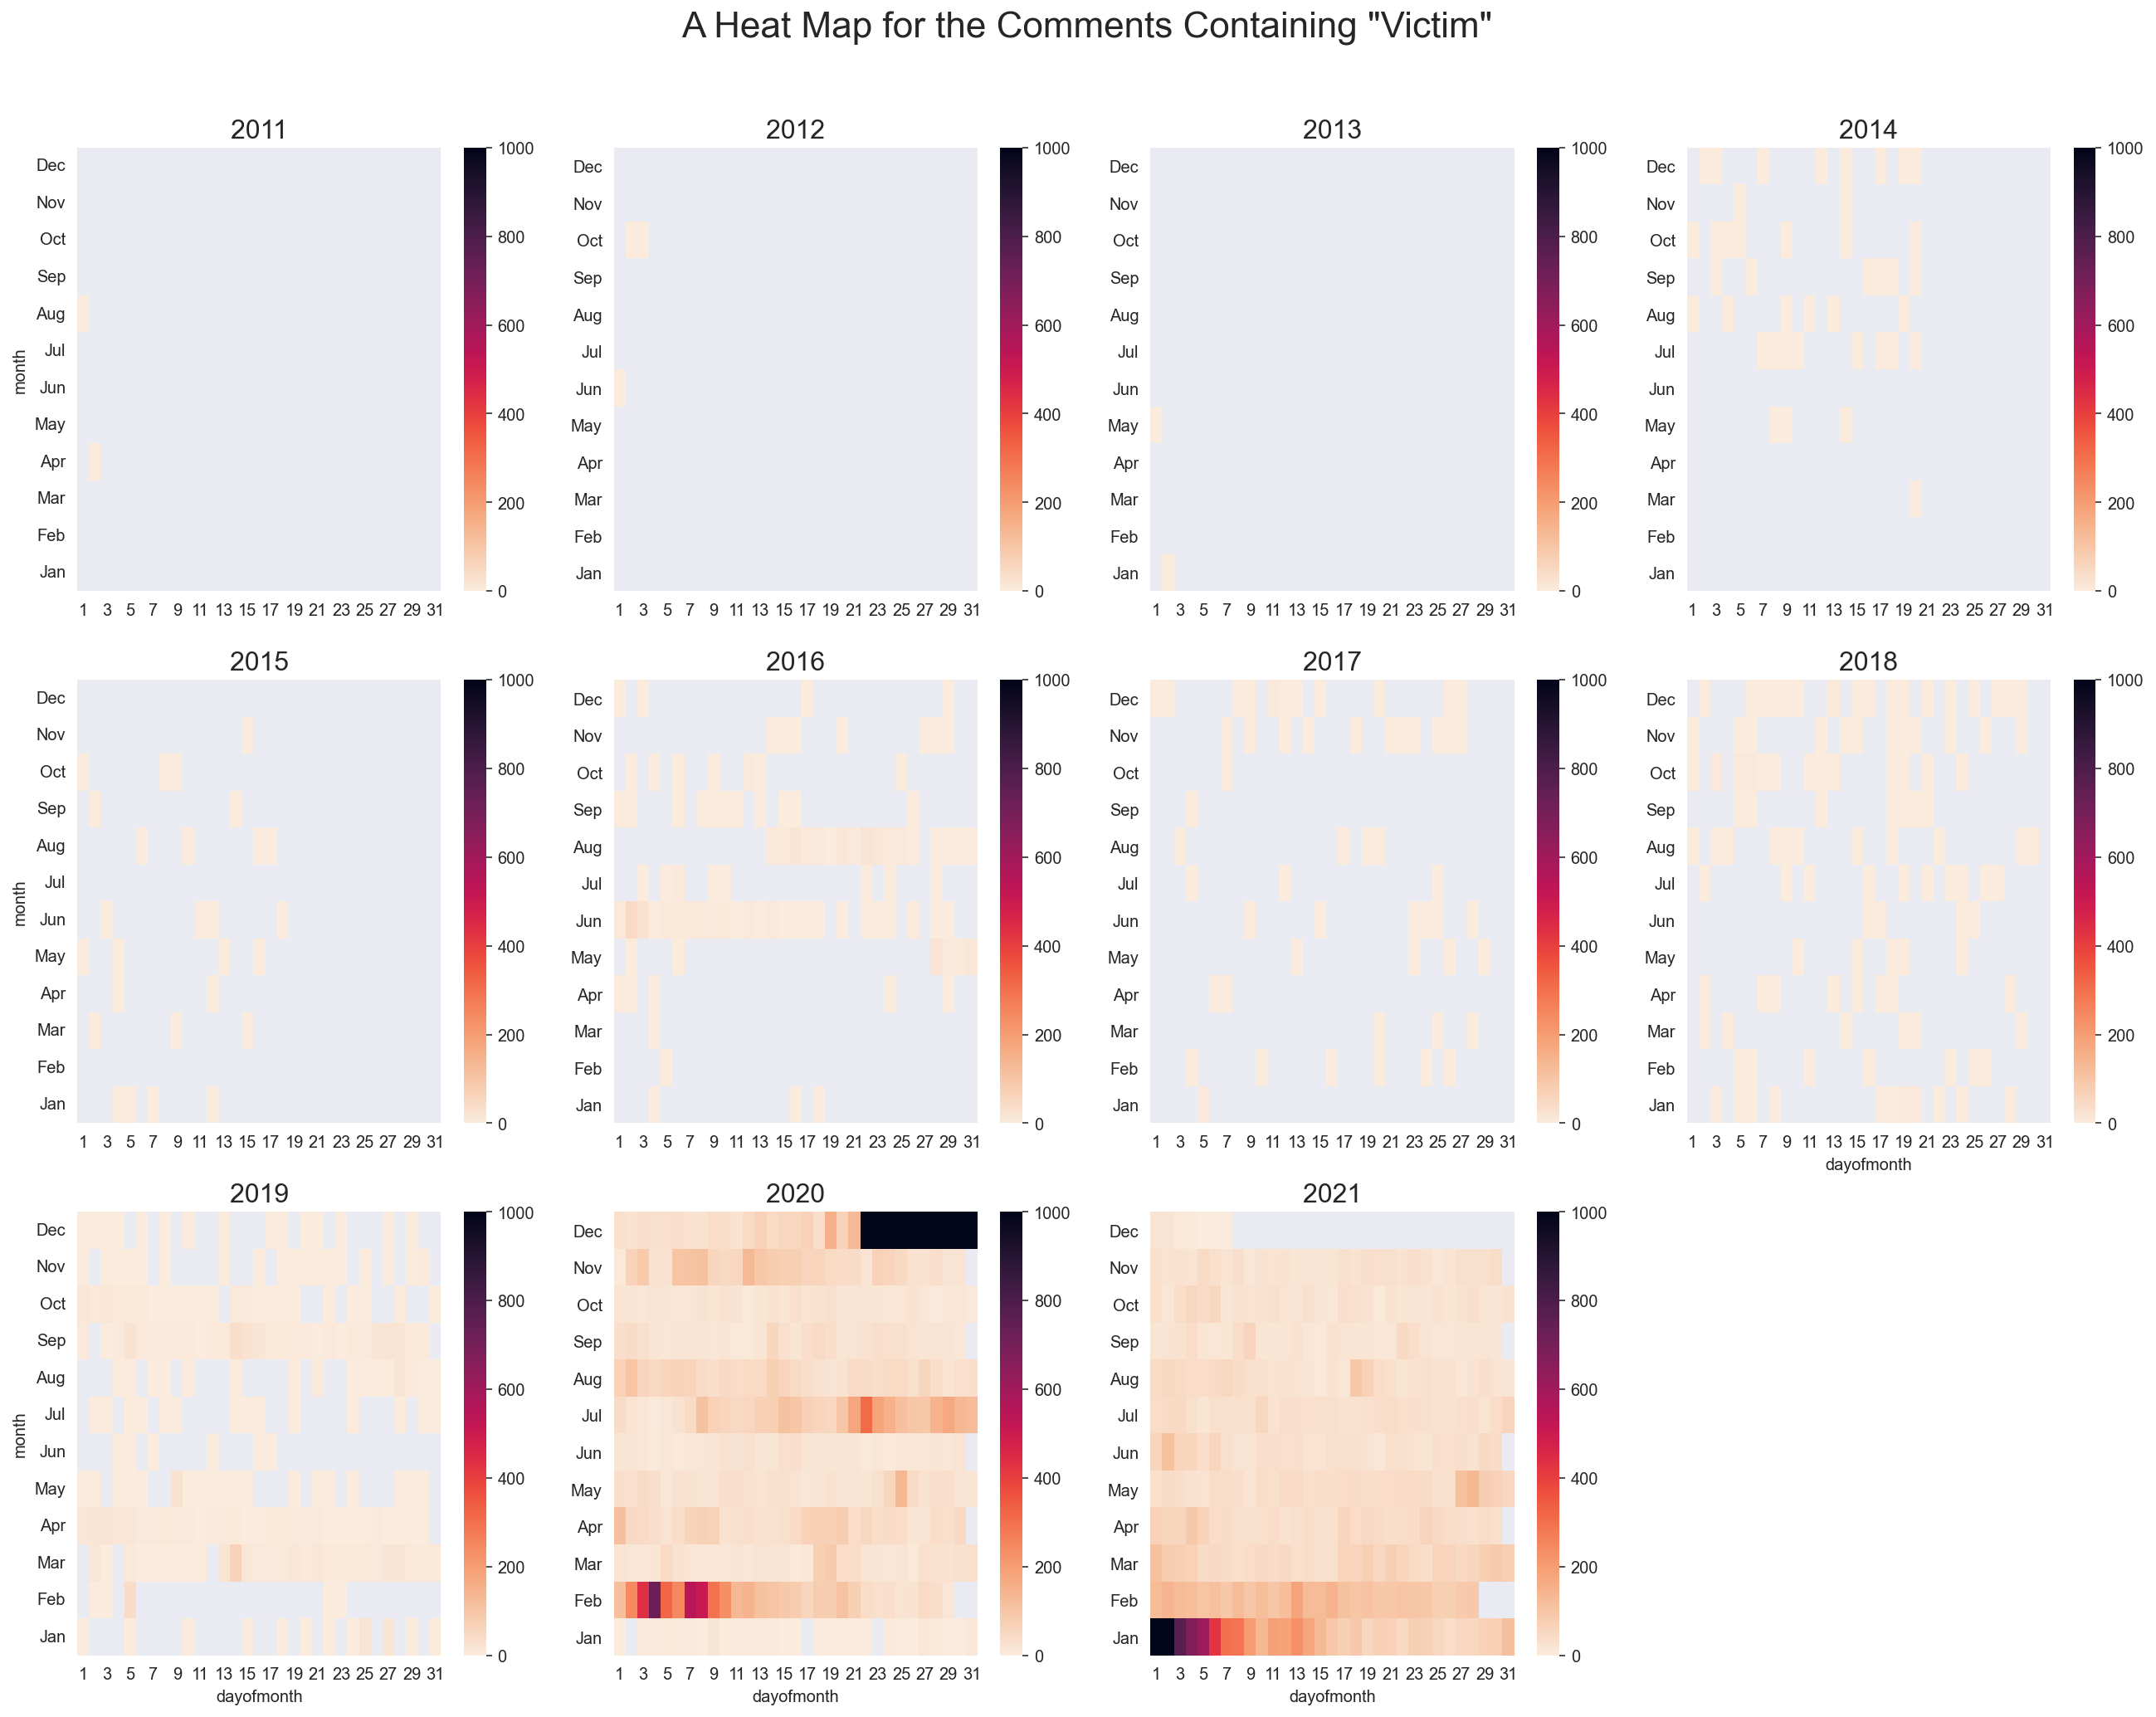

In [56]:
victim_daily = df_victim.groupby(['year', 'dayofmonth', 'month']).size().reset_index(name='ncomments')

print('\nNote: The Peaks on Feb, Dec 2020\n')
title = 'A Heat Map for the Comments Containing "Victim"'
helpers.facet_heat(victim_daily, title, n_col=4, vmax=1000)

In [57]:
df_victim.username.nunique()

83717

### Top Users with Comments Containing "victim" keyword

In [58]:
df_nvictim = df_victim.groupby('username').agg({'text':'count', 'nreplies': 'sum', 'nlikes': 'sum'}).reset_index(
).rename(columns={'text':'ncomments'})

print(df_nvictim.shape)
df_nvictim = df_nvictim.sort_values('ncomments', ascending=False)
df_nvictim.head(15)


(83717, 4)


username  ncomments  nreplies  nlikes
38416                                Lotta         79       0.0    35.0
15110                             Damn ...         62       0.0    17.0
60894           The Amber Heard Playlist!!         61      29.0     3.0
11440                        Carmen Castro         59      18.0   750.0
32672                          June Harris         52      14.0   407.0
40632                        Marianne Erni         47       5.0   118.0
83538  ل´ ل´‡ل´„ل´›ل´ڈت€ل´‡ل´…ل´›تœةھل´„ x         44      10.0   879.0
22502                        Frost_Daghers         43       0.0    10.0
53470                               Rose B         42       6.0    60.0
68745                        aria tatality         40       1.0     0.0
67767                           Zhong Xina         38       1.0  2219.0
48381                            Ov3r tube         38       0.0   210.0
67032                         Yolie Remeza         36       6.0   151.0
6398                         Ashely Holmes         36       9.0    35.0
48400                             Overtube         35       3.0   640.0

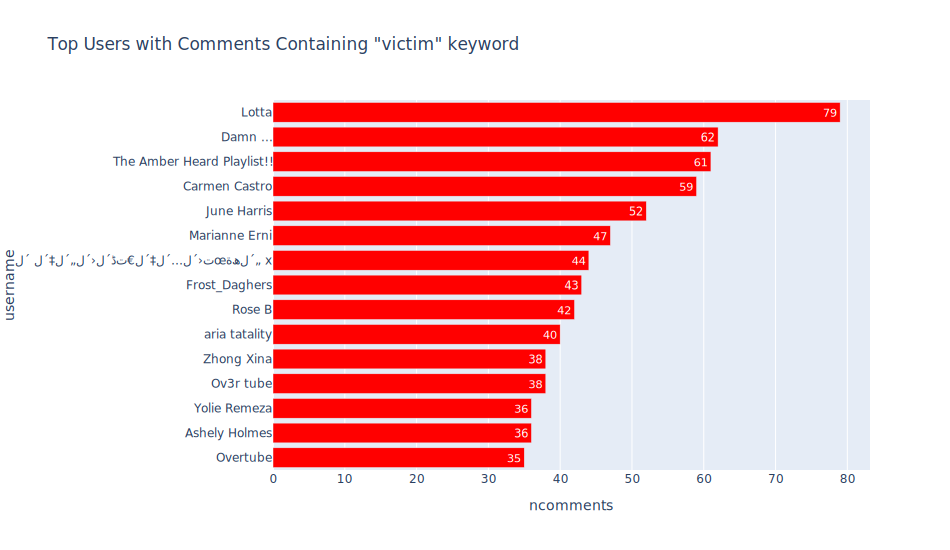

In [59]:
helpers.barh(df_nvictim[['username', 'ncomments']].head(15), 
             'Top Users with Comments Containing "victim" keyword', threshold=0)

### "victim" Users Contributions on Each Date

In [60]:
df_v = df_victim.groupby(['date', 'username']).agg({'text':'count', 'nlikes': 'sum', 'nreplies': 'sum'}).reset_index(
).rename(columns={'text':'ncomments'}).sort_values('ncomments', ascending=False)

df_v.head(15)


date                             username  ncomments  nlikes  \
63185 2020-12-29                             Damn ...         62    17.0   
33284 2020-12-25                        Frost_Daghers         43    10.0   
700   2019-02-05                                Lotta         40    10.0   
74290 2021-01-01                        aria tatality         40     0.0   
59367 2020-12-28                            Ov3r tube         38   210.0   
75935 2021-01-02  ل´ ل´‡ل´„ل´›ل´ڈت€ل´‡ل´…ل´›تœةھل´„ x         36    27.0   
90879 2021-09-09                        Ashely Holmes         36    35.0   
29892 2020-12-24                           Randale H1         35     9.0   
61745 2020-12-28                            you good?         35    12.0   
65564 2020-12-29             Sweet Succulent Euphoria         35   981.0   
31108 2020-12-24                           Zhong Xina         35  1582.0   
21799 2020-12-23                         Kabir Mishra         33     0.0   
82337 2021-02-13                          My thoughts         33   232.0   
72305 2020-12-31                      Sophia Cabaأ±ez         32     9.0   
50732 2020-12-27                             Overtube         31   533.0   

       nreplies  
63185       0.0  
33284       0.0  
700         0.0  
74290       1.0  
59367       0.0  
75935       2.0  
90879       9.0  
29892       0.0  
61745       0.0  
65564       0.0  
31108       0.0  
21799       0.0  
82337       4.0  
72305       0.0  
50732       1.0

### "victim" Peak Dates

In [61]:
victim_dates = df_victim.groupby(['date']).agg({'text':'count', 'nlikes': 'sum', 'nreplies': 'sum'}).reset_index(
).rename(columns={'text':'ncomments'}).sort_values('ncomments', ascending=False)

victim_dates.head(15)

date  ncomments    nlikes  nreplies
907 2020-12-27      12027  170323.0     534.0
906 2020-12-26       8836  167379.0     492.0
903 2020-12-23       7439  226062.0    1036.0
908 2020-12-28       7245   85634.0     329.0
904 2020-12-24       6786  229787.0     823.0
909 2020-12-29       5156   82621.0     426.0
910 2020-12-30       3909   69473.0     154.0
905 2020-12-25       3585   83649.0     306.0
911 2020-12-31       2259   42299.0     242.0
912 2021-01-01       1918   35567.0     244.0
902 2020-12-22       1410   69467.0     266.0
913 2021-01-02       1407   21486.0      63.0
914 2021-01-03        772   13221.0      88.0
580 2020-02-04        725   24651.0     528.0
915 2021-01-04        672   11931.0     126.0

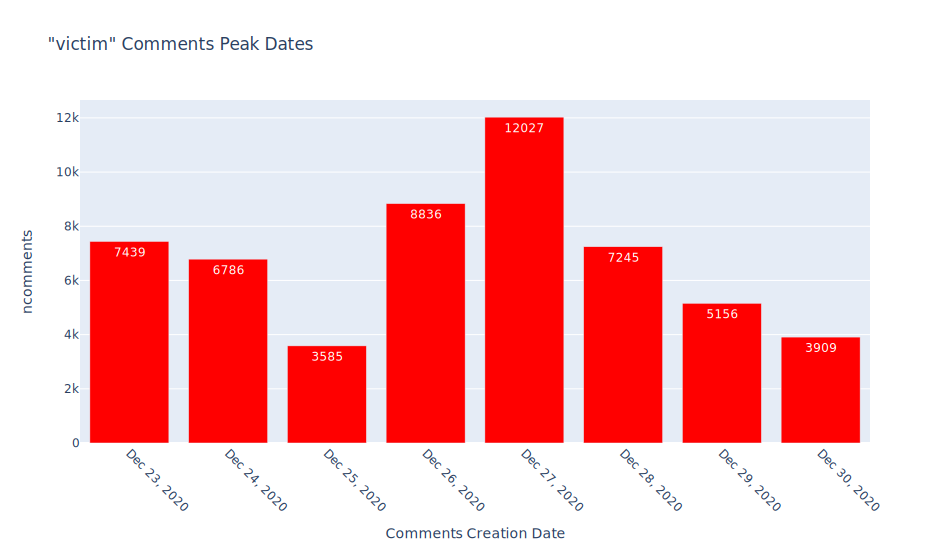

In [62]:
helpers.bar_peaks(victim_dates[['date', 'ncomments']].head(8), 
                  '"victim" Comments Peak Dates')

In [63]:
df_victim.text.value_counts().head(60)

they won't believe you because you are a man she is not a victim                                                                               43182
they won't believe you because you are a man amber heard she is not a victim                                                                    1591
they won't believe you because you are a man she is not the victim                                                                              1327
she is not a victim                                                                                                                             1108
they wont believe you because you are a man she is not a victim                                                                                 1015
they won't believe you because your a man she is not a victim                                                                                   1009
they won't believe you because you are a man she is not a victim!                                         

<br>

### More Investigations on Top Users Commented with "victim" Keyword

In [64]:
# set(df_v.username.head(15)) - set(df_n.username.head(15))

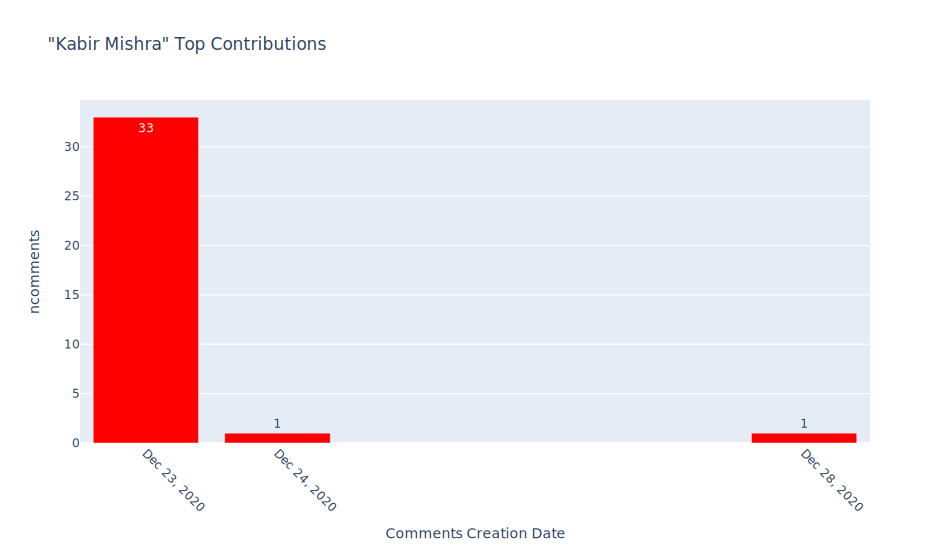

In [65]:
helpers.contr_peaks(df_comments, "Kabir Mishra", n=5, threshold=0)

In [66]:
df_comments[df_comments.username == "Kabir Mishra"].text.value_counts().head(60)

they won't believe you because you are a man she is not a victim    34
#justiceforjohnnydepp                                                1
Name: text, dtype: int64

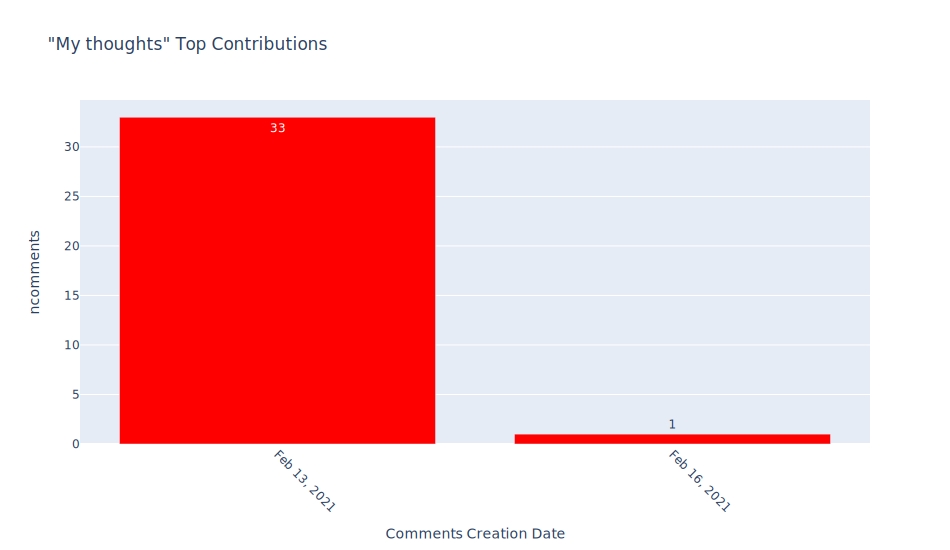

In [67]:
helpers.contr_peaks(df_comments, "My thoughts", n=5, threshold=0)

In [68]:
df_comments[df_comments.username == "My thoughts"].text.value_counts().head(60)

they won't believe you because you are a man she is not a victim!                 33
@collin willoughs ok so called koolًںک‚ًںک‚u can do nothing ًں¥؛stupidًں‘چًںڈ»     1
Name: text, dtype: int64

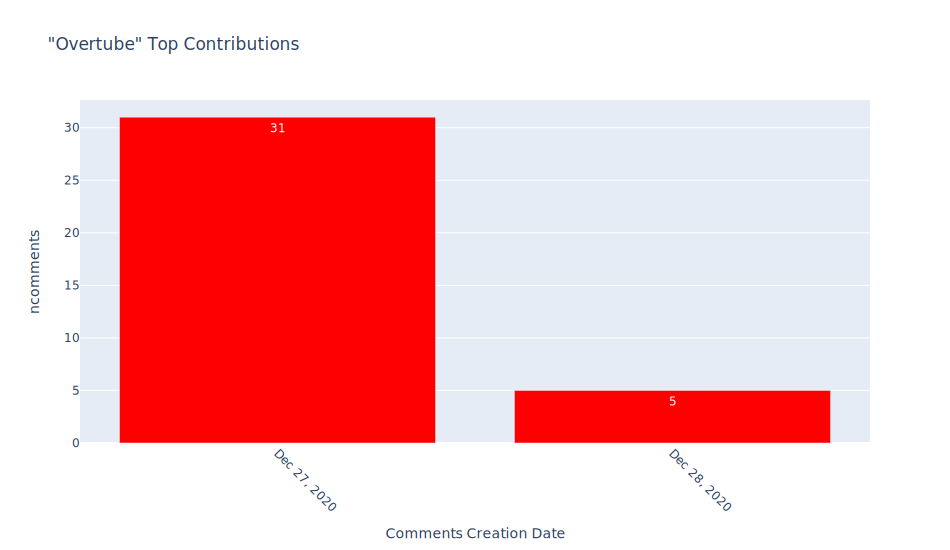

In [69]:
helpers.contr_peaks(df_comments, "Overtube", n=5, threshold=0)

In [70]:
df_comments[df_comments.username == "Overtube"].text.value_counts().head(60)

they won't believe you because you are a man she is not a victim    35
@mionfel trying my best to do 100 replies fuck errors                1
Name: text, dtype: int64

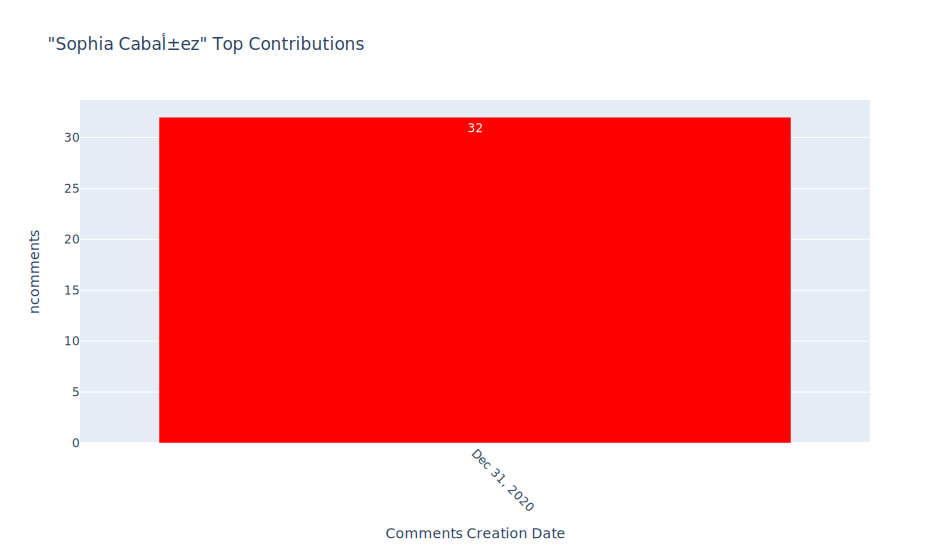

In [71]:
helpers.contr_peaks(df_comments, "Sophia Cabaأ±ez", n=5, threshold=0)

In [72]:
df_comments[df_comments.username == "Sophia Cabaأ±ez"].text.value_counts().head(60)

*she is not a victim*                                                 17
they won't believe you because you are a man *she is not a victim*    15
Name: text, dtype: int64

<br>

<a id='no_victim'></a>
>> ## Negative Comments Without "Victim"
> <ul>
 <li><a href="#negative_comments">Negative Comments</a></li>
 <li><a href="#victim">Contains "Victim"</a></li>
    <li><a href="#no_victim"><b>Negative Comments Without "Victim"</b></a></li>
 </ul>

In [73]:
# Create a negative dataframe without 'victim' keyword --> to see more negative text variations
df_neg = df_neg_total[~df_neg_total.text.str.contains('victim')]
print(f'{df_neg.shape[0]} contributions, on {df_neg.video_id.nunique()} Videos, made by {df_neg.username.nunique()} Users')
df_neg.head(2)

279558 contributions, on 4198 Videos, made by 158370 Users


video_id                 comment_etag                  comment_id  \
0  VPUUrdgxIa8  N0IcnfXWAATmNc7PATmVsXq5-58  UgycOQe20TUYIOyB5zR4AaABAg   
1  VPUUrdgxIa8  qorqkViON0Ig3VMl0EmlAvX5H3E  UgztIGiBkAiBgyO03rR4AaABAg   

                                                text            username  \
0  whoa hold on there buddy are you saying that p...  lowdownshakinchill   
1  it was part of an idiotic series of comments w...               jsssm   

               author_ch_id  nlikes                    p_dtime  \
0  UCCOdIP_feMgW00kp1fiE8fg     0.0  2013-09-01 18:55:13+00:00   
1  UCv0UUMS3TZgn68PnWDWAVpw     0.0  2013-08-15 22:56:15+00:00   

                     u_dtime  nreplies moderation_status comment_reply  \
0  2013-09-01 18:55:13+00:00       0.0               NaN       comment   
1  2013-08-15 22:56:15+00:00       0.0               NaN       comment   

  parent_id author_ch_url author_profile_image  year        date month  \
0      none          none                 none  2013  2013-09-01   Sep   
1      none          none                 none  2013  2013-08-15   Aug   

   dayofmonth  hour  
0           1    18  
1          15    22

In [74]:
df_neg.text.value_counts().head(60)

exposed                                                                                                                                                                                                                                                                                                                  752
amber turd                                                                                                                                                                                                                                                                                                               662
exposed!!!                                                                                                                                                                                                                                                                                                               517
abuser                                           

In [75]:
df_neg.text.value_counts()[60:].head(60)

#amberheardisaliar                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [76]:
df_neg.text.value_counts()[120:].head(60)

amber turd*                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [77]:
df_neg.text.value_counts()[180:].head(60)

disgusting!                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [78]:
df_neg.text.value_counts()[240:].head(60)

disgusting person                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [79]:
df_neg.text.value_counts()[300:].head(60)

scamber turd!                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [80]:
df_neg.text.value_counts()[360:].head(60)

jail her!                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

<br>

<a id='top_comments'></a>
>## Most Repeated Comments
> <ul>
 <li><a href="#spam">Likely Spam</a></li>
 <li><a href="#pos_comments">Positive Comments</a></li>
 <li><a href="#threat_comments">Threat Comments</a></li>
 <li><a href="#neg_comments">Negative Comments</a></li>
 <li><a href="#top_comments"><b>Most Repeated Comments</b></a></li>
 <li><a href="#same">Same Text Same Date</a></li>
 <li><a href="#text_investigation">Primary Text Investigation</a></li>
 </ul>

In [81]:
df_comments.text.value_counts().head(30)

they won't believe you because you are a man she is not a victim                                                                                                                                                                                                                                                                                      43370
that's crazy                                                                                                                                                                                                                                                                                                                                           5968
#justiceforjohnnydepp                                                                                                                                                                                                                                                                                           

<a id='same'></a>
>## Same Text Same Date
> <ul>
 <li><a href="#spam">Likely Spam</a></li>
 <li><a href="#pos_comments">Positive Comments</a></li>
 <li><a href="#threat_comments">Threat Comments</a></li>
 <li><a href="#neg_comments">Negative Comments</a></li>
 <li><a href="#top_comments">Most Repeated Comments</a></li>
 <li><a href="#same"><b>Same Text Same Date</b></a></li>
 <li><a href="#text_investigation">Primary Text Investigation</a></li>
 </ul>

In [82]:
df_comments.head(1)

video_id                 comment_etag            comment_id        text  \
0  DiXRVYRZchs  mvtTos5huTqXhtAs-JPzt7mls_A  UgjyORuX3p35VXgCoAEC  good work!   

        username              author_ch_id  nlikes                   p_dtime  \
0  Shocka Delica  UC6cJzw3ChENHVREKzpx1e3Q     9.0 2013-11-29 05:18:47+00:00   

                    u_dtime  nreplies moderation_status comment_reply  \
0 2013-11-29 05:18:47+00:00       1.0               NaN       comment   

  parent_id author_ch_url author_profile_image  year       date month  \
0      none          none                 none  2013 2013-11-29   Nov   

   dayofmonth  hour  
0          29     5

In [83]:
# print('\nThe Amplifications in the counts and number of likes on #justiceforjohnnydepp is quite obvious!!')
df_same = df_comments.groupby(["text", "date"]).agg({'comment_id':'count', 'nreplies':'sum', 'nlikes':'sum'}).reset_index()
df_same.rename(columns={'comment_id': 'ncomments'}, inplace=True) 
df_same.sort_values(["ncomments", 'date'], ascending=[False, True]).head(60)


text       date  \
1641232  they won't believe you because you are a man s... 2020-12-27   
1641231  they won't believe you because you are a man s... 2020-12-26   
1641233  they won't believe you because you are a man s... 2020-12-28   
1641228  they won't believe you because you are a man s... 2020-12-23   
1641229  they won't believe you because you are a man s... 2020-12-24   
1641234  they won't believe you because you are a man s... 2020-12-29   
1641235  they won't believe you because you are a man s... 2020-12-30   
1641230  they won't believe you because you are a man s... 2020-12-25   
1639882  they won't believe you because you are a man a... 2020-12-22   
1641236  they won't believe you because you are a man s... 2020-12-31   
1641237  they won't believe you because you are a man s... 2021-01-01   
1641238  they won't believe you because you are a man s... 2021-01-02   
1640216  they won't believe you because you are a man a... 2020-12-22   
1640217  they won't believe you because you are a man a... 2020-12-23   
1641239  they won't believe you because you are a man s... 2021-01-03   
1641240  they won't believe you because you are a man s... 2021-01-04   
1641241  they won't believe you because you are a man s... 2021-01-05   
1644678  they won't believe you because your a man she ... 2020-12-30   
1646192  they wont believe you because you are a man am... 2020-12-22   
1639508       they won't believe you because you are a man 2020-12-23   
1644677  they won't believe you because your a man she ... 2020-12-29   
1643059  they won't believe you because you are a man s... 2020-12-27   
1044277                                 justice for johnny 2020-12-22   
1552926                                       that's crazy 2021-03-03   
1643056  they won't believe you because you are a man s... 2020-12-24   
1641242  they won't believe you because you are a man s... 2021-01-06   
1639883  they won't believe you because you are a man a... 2020-12-23   
1646347  they wont believe you because you are a man sh... 2020-12-27   
520858                                    execute order 66 2020-12-22   
1643058  they won't believe you because you are a man s... 2020-12-26   
1646346  they wont believe you because you are a man sh... 2020-12-26   
1552916                                       that's crazy 2021-02-21   
1644583  they won't believe you because your a man ambe... 2020-12-22   
6951                                       #justicefordepp 2020-11-08   
1401859                                she is not a victim 2020-12-24   
1641243  they won't believe you because you are a man s... 2021-01-07   
1643055  they won't believe you because you are a man s... 2020-12-23   
1639507       they won't believe you because you are a man 2020-12-22   
1641244  they won't believe you because you are a man s... 2021-01-08   
578111                         good soldiers follow orders 2020-12-26   
1641249  they won't believe you because you are a man s... 2021-01-13   
7437                                     #justiceforjohnny 2020-12-22   
1642737  they won't believe you because you are a man s... 2020-12-27   
1044278                                 justice for johnny 2020-12-23   
1642736  they won't believe you because you are a man s... 2020-12-26   
1401858                                she is not a victim 2020-12-23   
1552928                                       that's crazy 2021-03-05   
1552933                                       that's crazy 2021-03-10   
1639509       they won't believe you because you are a man 2020-12-24   
1963694  your lies have been revealed to us you are not... 2021-01-01   
1552934                                       that's crazy 2021-03-11   
8456                                 #justiceforjohnnydepp 2020-12-24   
1876342                                                wow 2020-10-24   
1552927                                       that's crazy 2021-03-04   
7438                                   

<a id='text_investigation'></a>
> ## Primary Text Investigation
> <ul>
 <li><a href="#spam">Likely Spam</a></li>
 <li><a href="#pos_comments">Positive Comments</a></li>
 <li><a href="#threat_comments">Threat Comments</a></li>
 <li><a href="#neg_comments">Negative Comments</a></li>
 <li><a href="#top_comments">Most Repeated Comments</a></li>
 <li><a href="#same">Same Text Same Date</a></li>
 <li><a href="#text_investigation"><b>Primary Text Investigation</b></a></li>
 </ul>

In This Section: 
- We will investigate the text related to Amber in the data to extract the most repeated "keywords" to further use in the analysis.

### Contains Amber

In [84]:
df_comments[df_comments.text.str.contains('amber')].text.value_counts().head(60)

they won't believe you because you are a man amber heard                                                                                                                                                                                                                                                                                                                                                                                                                                 2253
they won't believe you because you are a man amber heard she is not a victim                                                                                                                                                                                                                                                                                                                                                                                                             1599
amber turd                                  

In [85]:
df_comments[df_comments.text.str.contains('with amber')].text.value_counts().head(60)

i will never watch a movie with amber heard in it many others feel the same way i personally know what it is like to be falsely accused by a woman                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

### Contains Johnny

In [86]:
df_comments[df_comments.text.str.contains('johnny')].text.value_counts().head()

#justiceforjohnnydepp                                                                                                                                                                                                                                                                                                                                 2800
ًں’“thanks for your utmost love and support which has brought me this far it has been a hard time for me but your support has got me standing even in difficult times i can't appreciate enough the support of fans who have been really active with issues relating to meprivate message on telegram @johnnydeppllofficial  ًں’“ much love â‌¤ï¸ڈ    2786
justice for johnny                                                                                                                                                                                                                                                                                                

### Contains F*ck

In [87]:
df_fuck = df_comments[df_comments.text.str.contains('fuck')]
print(f'{df_fuck.shape[0]} contributions, on {df_fuck.video_id.nunique()} Videos, made by {df_fuck.username.nunique()} Users')


39421 contributions, on 2161 Videos, made by 32874 Users


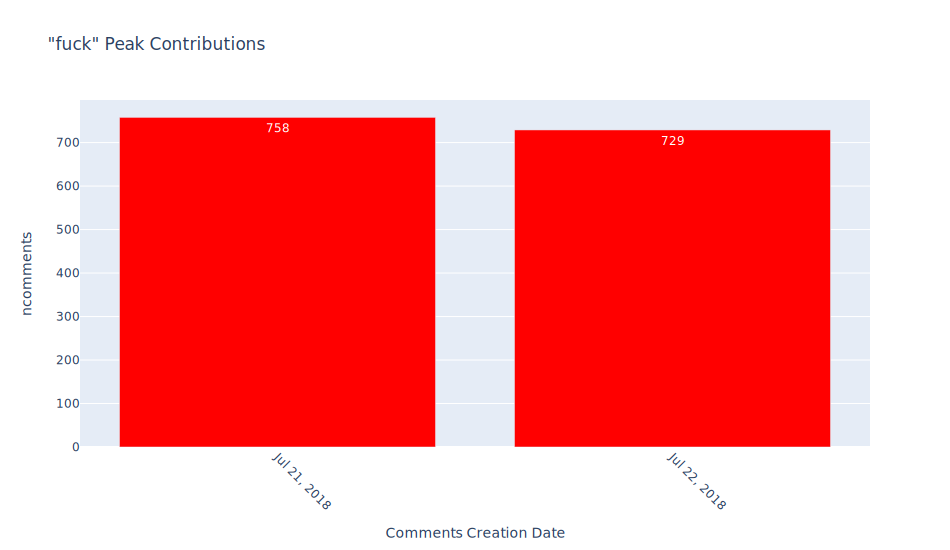

In [88]:
helpers.keyword_peaks(df_comments, 'fuck', n=2, threshold=0)

In [89]:
df_fuck.text.value_counts().head(60)

fuck amber heard                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

### Contains B*tch

In [90]:
df_bitch = df_comments[df_comments.text.str.contains('bitch')]
print(f'{df_bitch.shape[0]} contributions, on {df_bitch.video_id.nunique()} Videos, made by {df_bitch.username.nunique()} Users')


19839 contributions, on 1856 Videos, made by 16322 Users


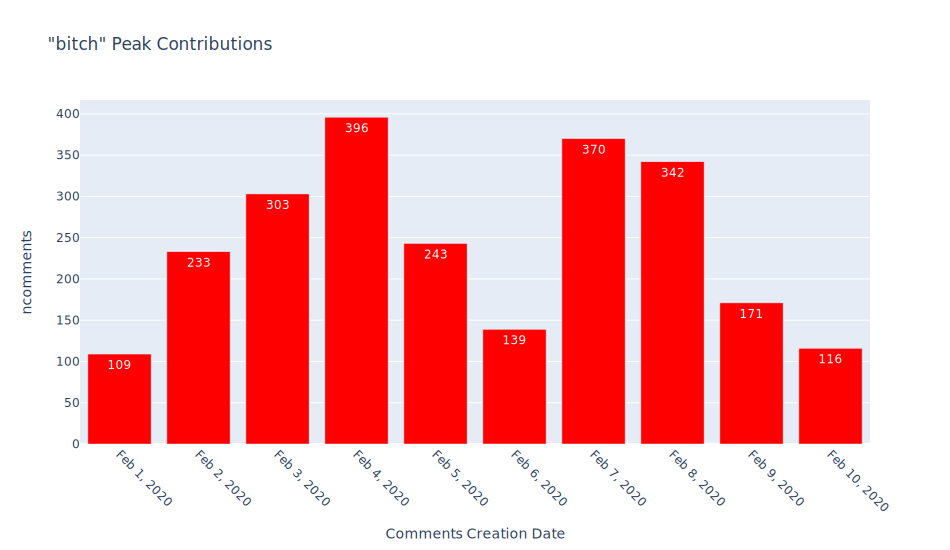

In [91]:
helpers.keyword_peaks(df_comments, 'bitch', n=10, threshold=0)

In [92]:
df_bitch.text.value_counts().head(60)

bitch                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

### Contains Abuser

In [93]:
df_abuser = df_comments[df_comments.text.str.contains('abus')]
print(f'{df_abuser.shape[0]} contributions, on {df_abuser.video_id.nunique()} Videos, made by {df_abuser.username.nunique()} Users')


100415 contributions, on 3503 Videos, made by 57256 Users


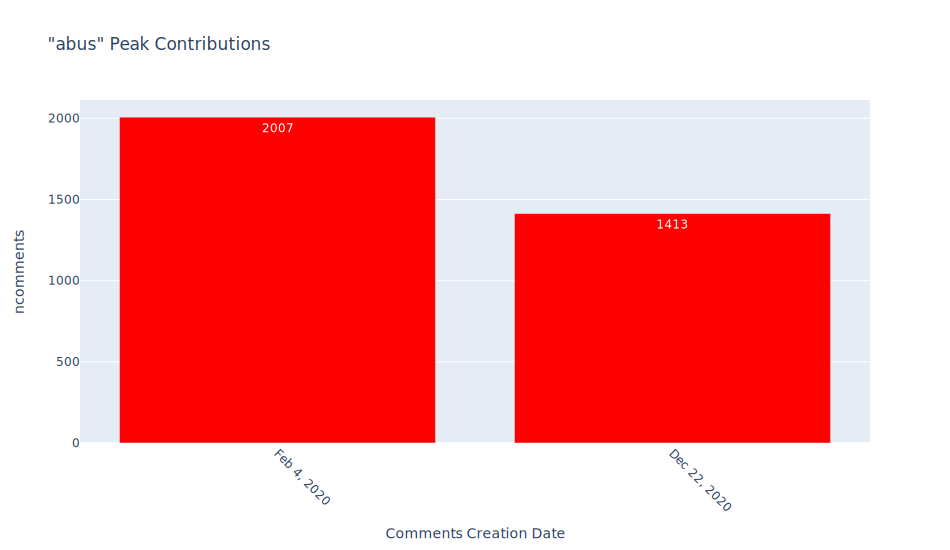

In [94]:
helpers.keyword_peaks(df_comments, 'abus', n=2, threshold=0)

In [95]:
df_abuser.text.value_counts().head(60)

abuser                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

### Contains Liar

In [96]:
df_liar = df_comments[df_comments.text.str.contains('liar')]
print(f'{df_liar.shape[0]} contributions, on {df_liar.video_id.nunique()} Videos, made by {df_liar.username.nunique()} Users')


19020 contributions, on 2565 Videos, made by 12767 Users


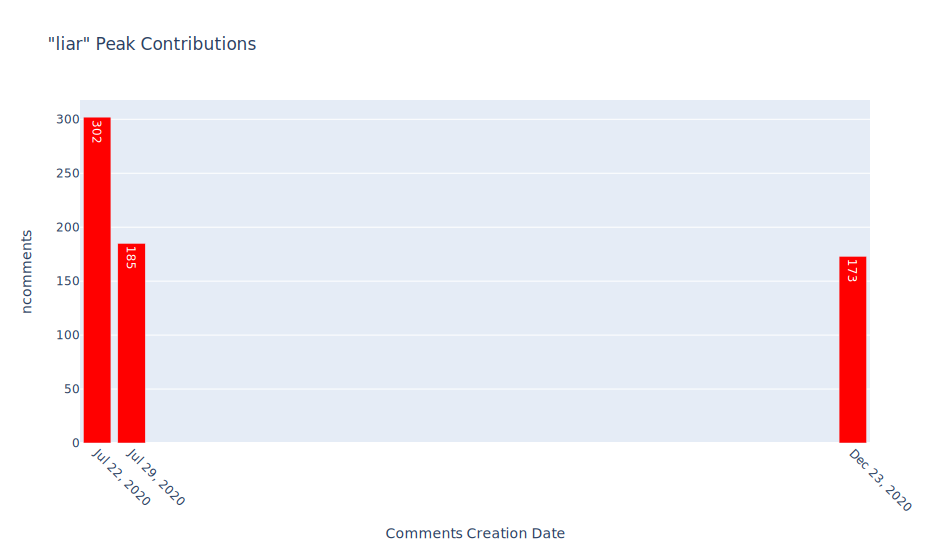

In [97]:
helpers.keyword_peaks(df_comments, 'liar', n=3, threshold=0)

In [98]:
df_liar.text.value_counts().head(60)

liar                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

### Contains Crazy

In [99]:
df_crazy = df_comments[df_comments.text.str.contains('crazy')]
print(f'{df_crazy.shape[0]} contributions, on {df_crazy.video_id.nunique()} Videos, made by {df_crazy.username.nunique()} Users')


33681 contributions, on 2179 Videos, made by 26678 Users


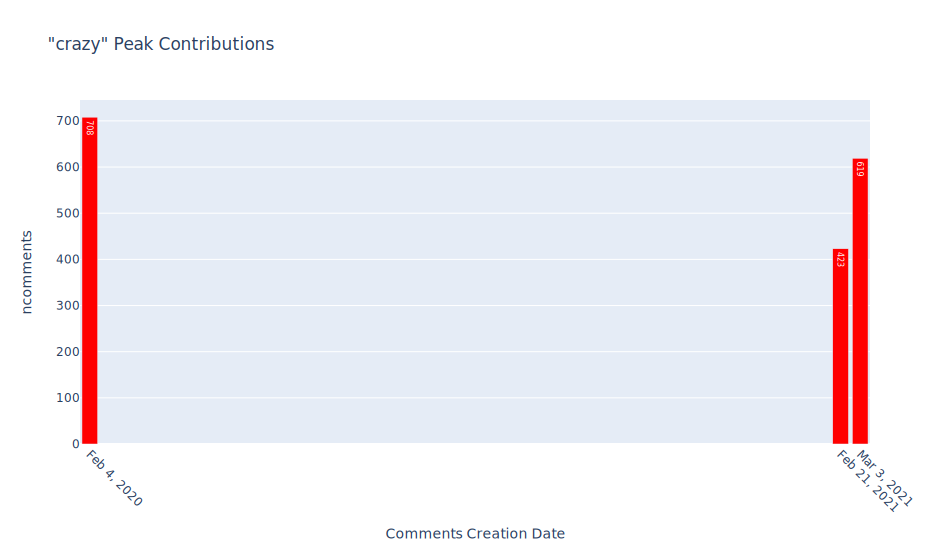

In [100]:
helpers.keyword_peaks(df_comments, 'crazy', n=3, threshold=0)

In [101]:
df_crazy.text.value_counts().head(60)

that's crazy                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

### Contains Disgusting

In [102]:
df_disgusting = df_comments[df_comments.text.str.contains('disgusting')]
print(f'{df_disgusting.shape[0]} contributions, on {df_disgusting.video_id.nunique()} Videos, made by {df_disgusting.username.nunique()} Users')


12716 contributions, on 1937 Videos, made by 9763 Users


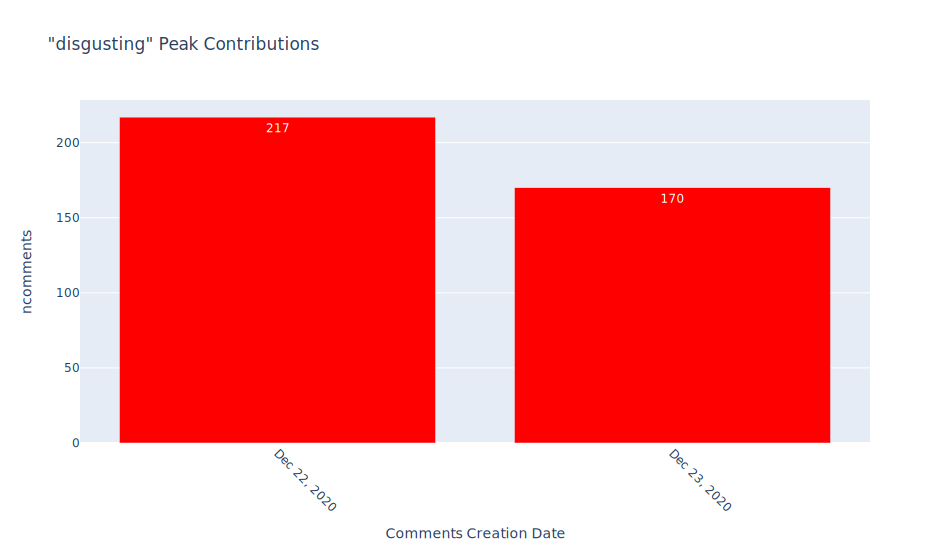

In [103]:
# importlib.reload(helpers)
helpers.keyword_peaks(df_comments, 'disgusting', n=2, threshold=0)

In [104]:
df_disgusting.text.value_counts().head(60)

disgusting                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

### Contains Jail

In [105]:
df_jail = df_comments[df_comments.text.str.contains('jail')]
print(f'{df_jail.shape[0]} contributions, on {df_jail.video_id.nunique()} Videos, made by {df_jail.username.nunique()} Users')


18937 contributions, on 2203 Videos, made by 13168 Users


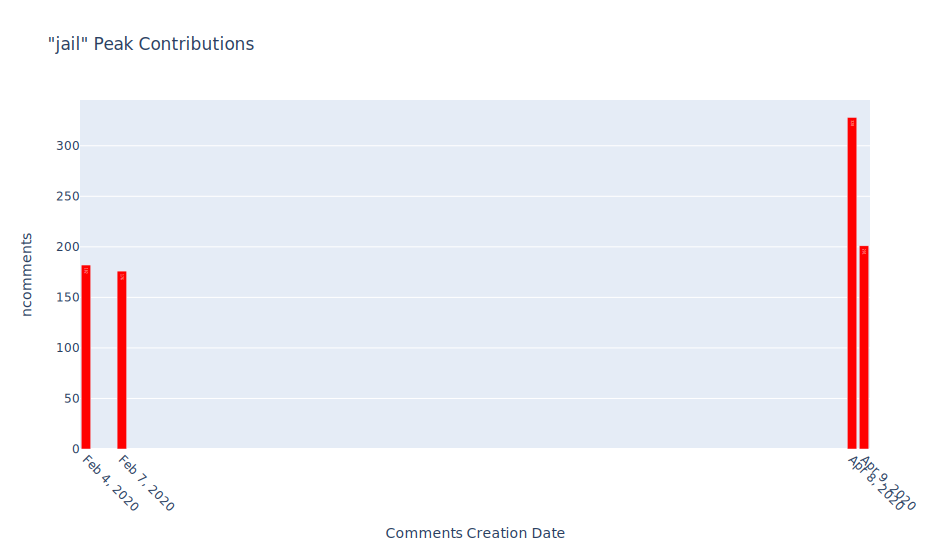

In [106]:
helpers.keyword_peaks(df_comments, 'jail', n=4, threshold=0)

In [107]:
df_jail.text.value_counts().head(60)

she should be in jail                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

<br>

<a id = 'conclusions'></a>
## Conclusions
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions"><b>Conclusions</b></a></li>
</ul>

<a id = 'end'><a/>
# END OF NOTEBOOK

<br>